In [ ]:
!pip install torch-geometric



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.9 MB/s eta 0:00:00


# FROM HERE

<ipython-input-1-27c6229ca38d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_ons', y='route_name', data=mbta_data, estimator=sum, ci=None, label='Total Ons')
<ipython-input-1-27c6229ca38d>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_offs', y='route_name', data=mbta_data, estimator=sum, ci=None, label='Total Offs')


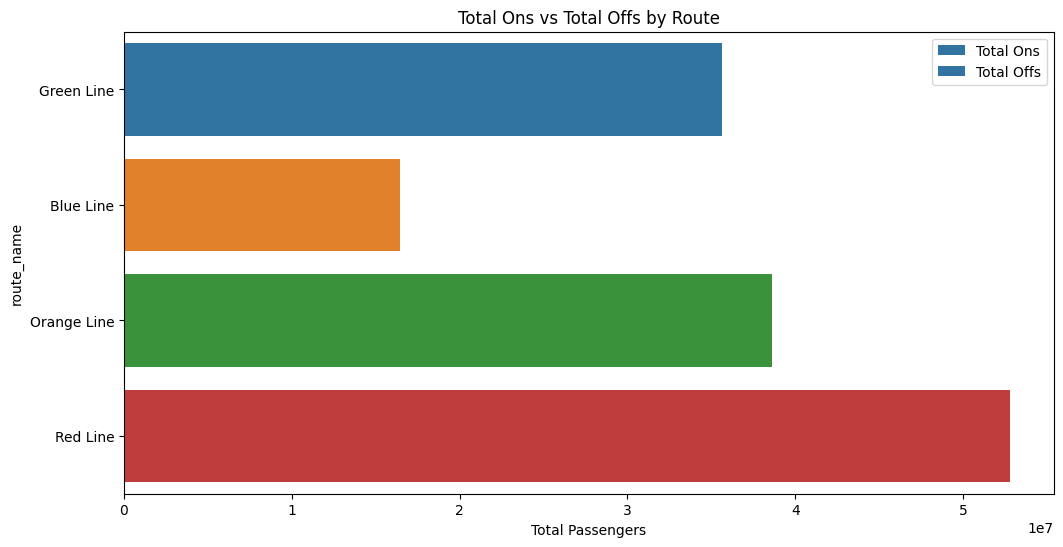

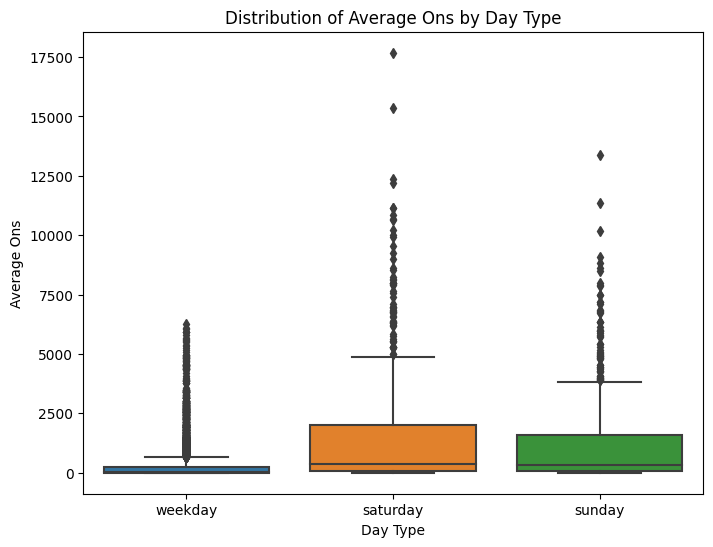

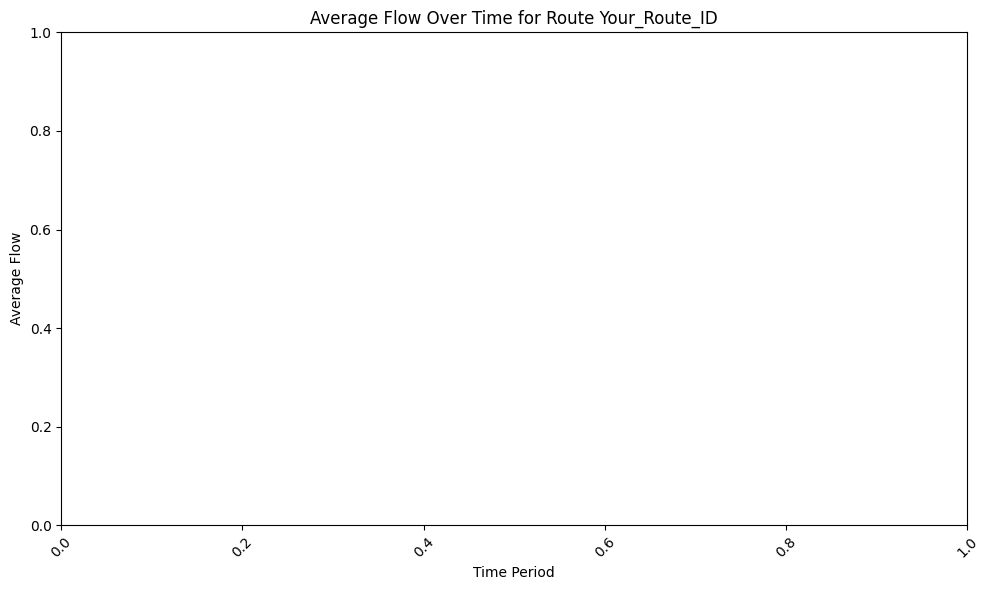

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load MBTA rail passenger data
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')  # Replace 'your_mbta_data.csv' with your file path

# Example visualizations:

# 1. Bar plot for total_ons and total_offs by route_name
plt.figure(figsize=(12, 6))
sns.barplot(x='total_ons', y='route_name', data=mbta_data, estimator=sum, ci=None, label='Total Ons')
sns.barplot(x='total_offs', y='route_name', data=mbta_data, estimator=sum, ci=None, label='Total Offs')
plt.xlabel('Total Passengers')
plt.title('Total Ons vs Total Offs by Route')
plt.legend()
plt.show()

# 2. Boxplot for average_ons by day_type_name
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_type_name', y='average_ons', data=mbta_data)
plt.xlabel('Day Type')
plt.ylabel('Average Ons')
plt.title('Distribution of Average Ons by Day Type')
plt.show()

# 3. Line plot for average_flow over time_periods for a specific route_id
route_id_to_visualize = 'Your_Route_ID'  # Replace with an actual route ID from your data
route_data = mbta_data[mbta_data['route_id'] == route_id_to_visualize]
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_period_name', y='average_flow', data=route_data)
plt.xlabel('Time Period')
plt.ylabel('Average Flow')
plt.title(f'Average Flow Over Time for Route {route_id_to_visualize}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feel free to customize these visualizations further based on your specific analysis goals and data attributes.


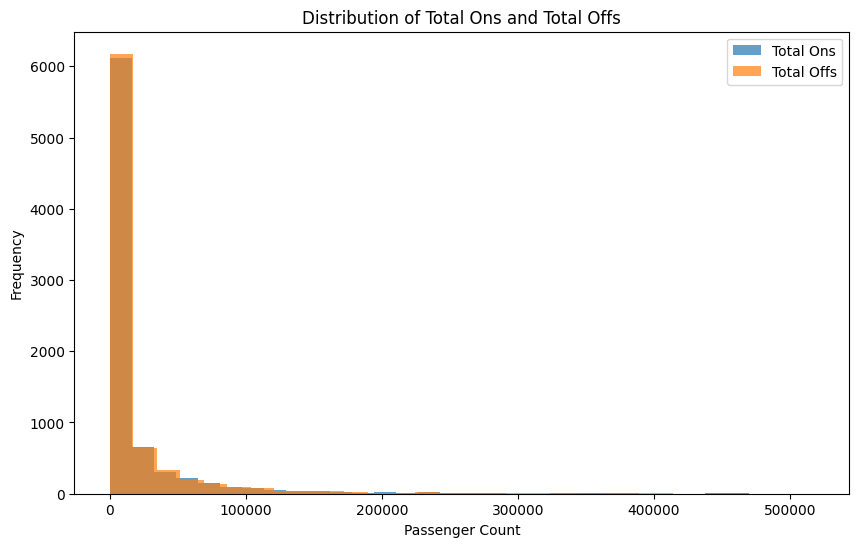

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(mbta_data['total_ons'], bins=30, alpha=0.7, label='Total Ons')
plt.hist(mbta_data['total_offs'], bins=30, alpha=0.7, label='Total Offs')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Total Ons and Total Offs')
plt.legend()
plt.show()

<ipython-input-3-ee6ae5327ccf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='average_ons', data=mbta_data, ci=None, label='Average Ons')
<ipython-input-3-ee6ae5327ccf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='average_offs', data=mbta_data, ci=None, label='Average Offs')


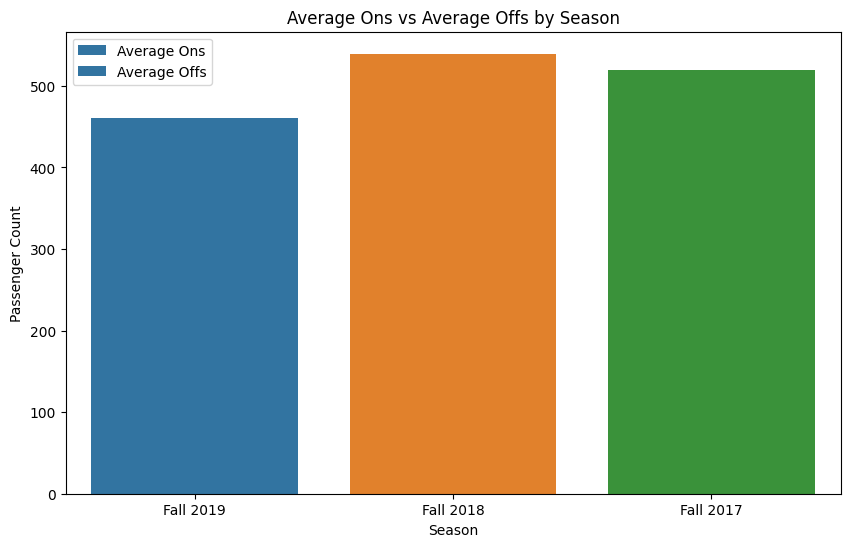

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='average_ons', data=mbta_data, ci=None, label='Average Ons')
sns.barplot(x='season', y='average_offs', data=mbta_data, ci=None, label='Average Offs')
plt.xlabel('Season')
plt.ylabel('Passenger Count')
plt.title('Average Ons vs Average Offs by Season')
plt.legend()
plt.show()

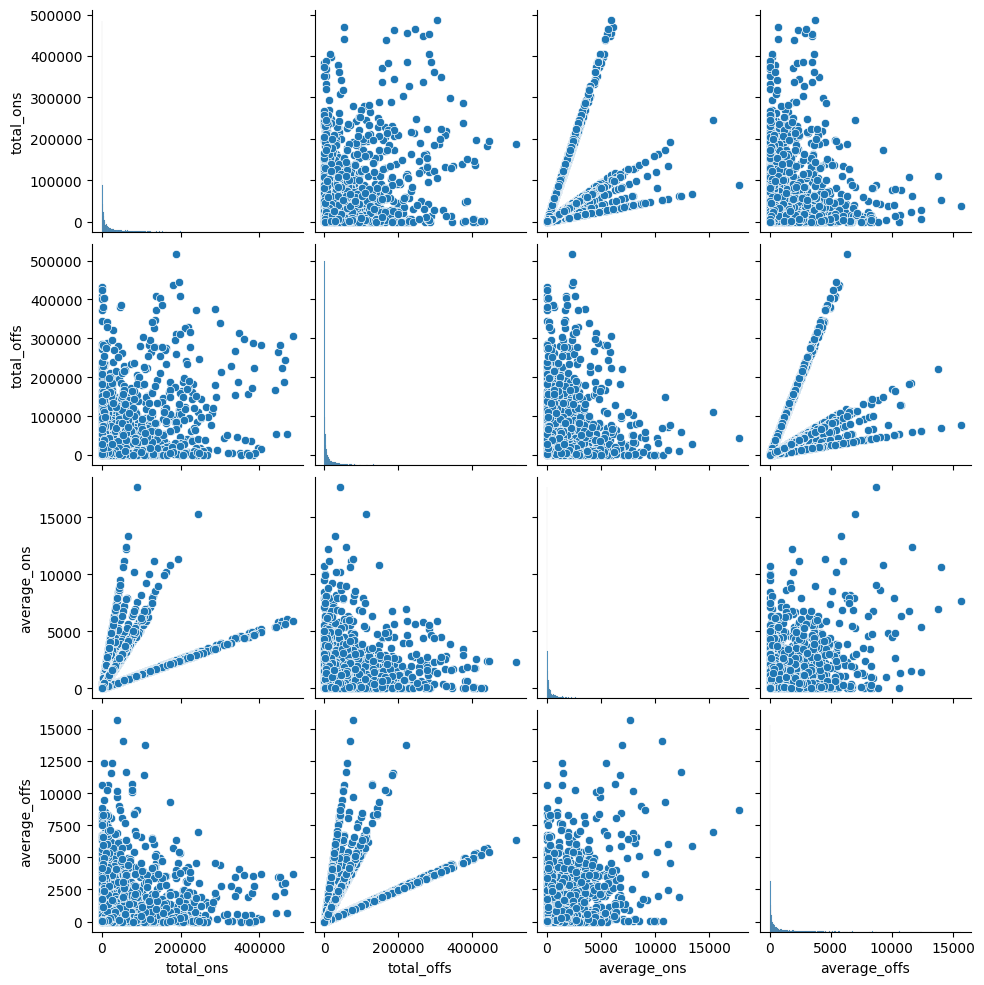

In [ ]:
sns.pairplot(mbta_data[['total_ons', 'total_offs', 'average_ons', 'average_offs']])
plt.show()

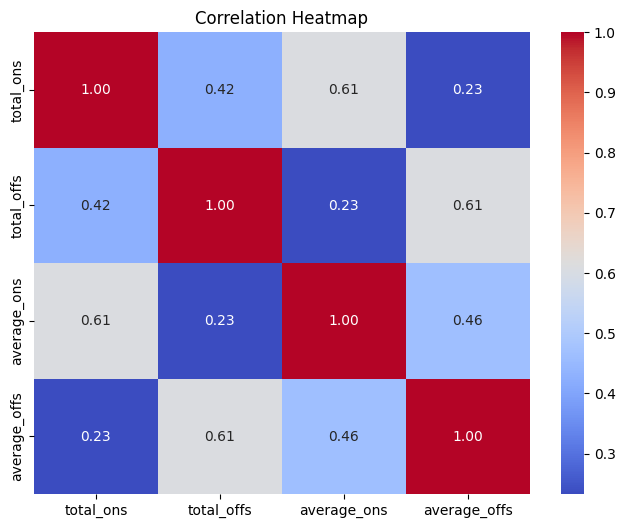

In [ ]:
plt.figure(figsize=(8, 6))
corr = mbta_data[['total_ons', 'total_offs', 'average_ons', 'average_offs']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

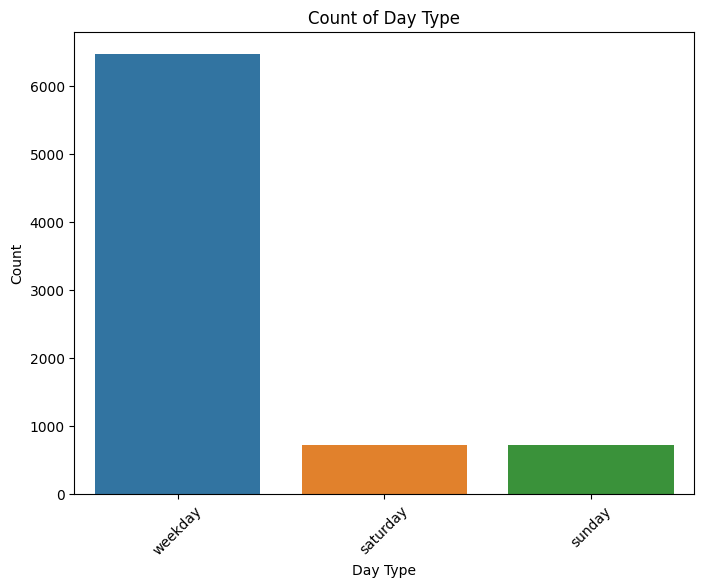

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day_type_name', data=mbta_data, order=mbta_data['day_type_name'].value_counts().index)
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Count of Day Type')
plt.xticks(rotation=45)
plt.show()

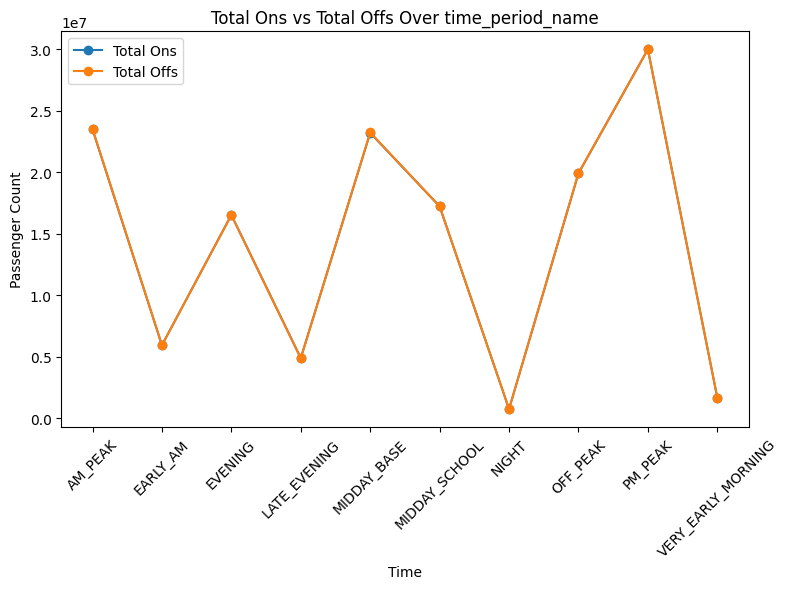

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load MBTA rail passenger data
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')  # Replace 'your_mbta_data.csv' with your file path

# Assuming there is a column representing a time-related sequence or categorical variable to iterate over
time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating total_ons and total_offs
grouped_data = mbta_data.groupby(time_column).agg({'total_ons': 'sum', 'total_offs': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.plot(grouped_data['total_ons'].iloc[:frame + 1], label='Total Ons', marker='o')
    ax.plot(grouped_data['total_offs'].iloc[:frame + 1], label='Total Offs', marker='o')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Passenger Count')
    ax.set_title(f'Total Ons vs Total Offs Over {time_column}')
    plt.xticks(range(len(grouped_data)), grouped_data[time_column].tolist(), rotation=45)
    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_ons_vs_total_offs.gif', writer='pillow', fps=2)

# Display the plot (optional)
plt.show()


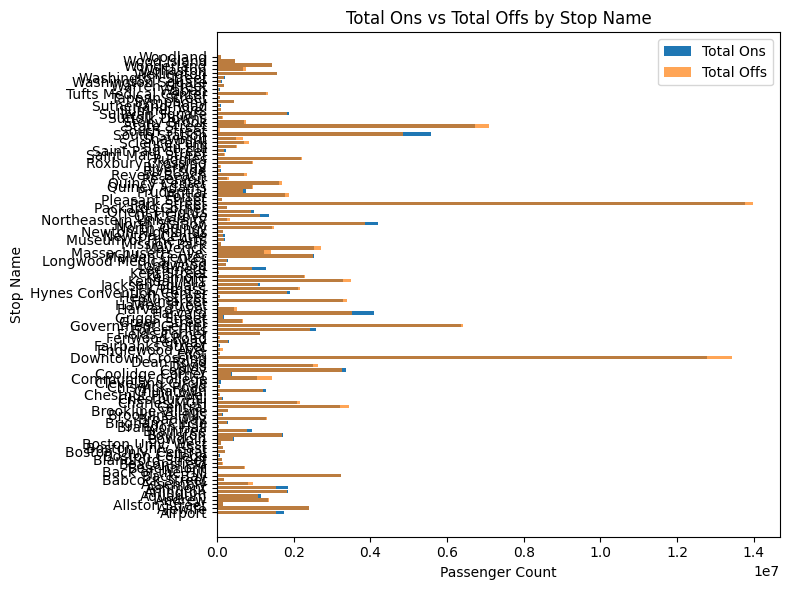

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load MBTA rail passenger data
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')  # Replace 'your_mbta_data.csv' with your file path

# Grouping by stop_name and aggregating total_ons and total_offs
grouped_data = mbta_data.groupby('stop_name').agg({'total_ons': 'sum', 'total_offs': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_ons'][:frame + 1], label='Total Ons')
    ax.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_offs'][:frame + 1], label='Total Offs', alpha=0.7)
    ax.legend()
    ax.set_xlabel('Passenger Count')
    ax.set_ylabel('Stop Name')
    ax.set_title(f'Total Ons vs Total Offs by Stop Name')
    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_ons_vs_total_offs_by_stop.gif', writer='pillow', fps=5)

# Display the plot (optional)
plt.show()


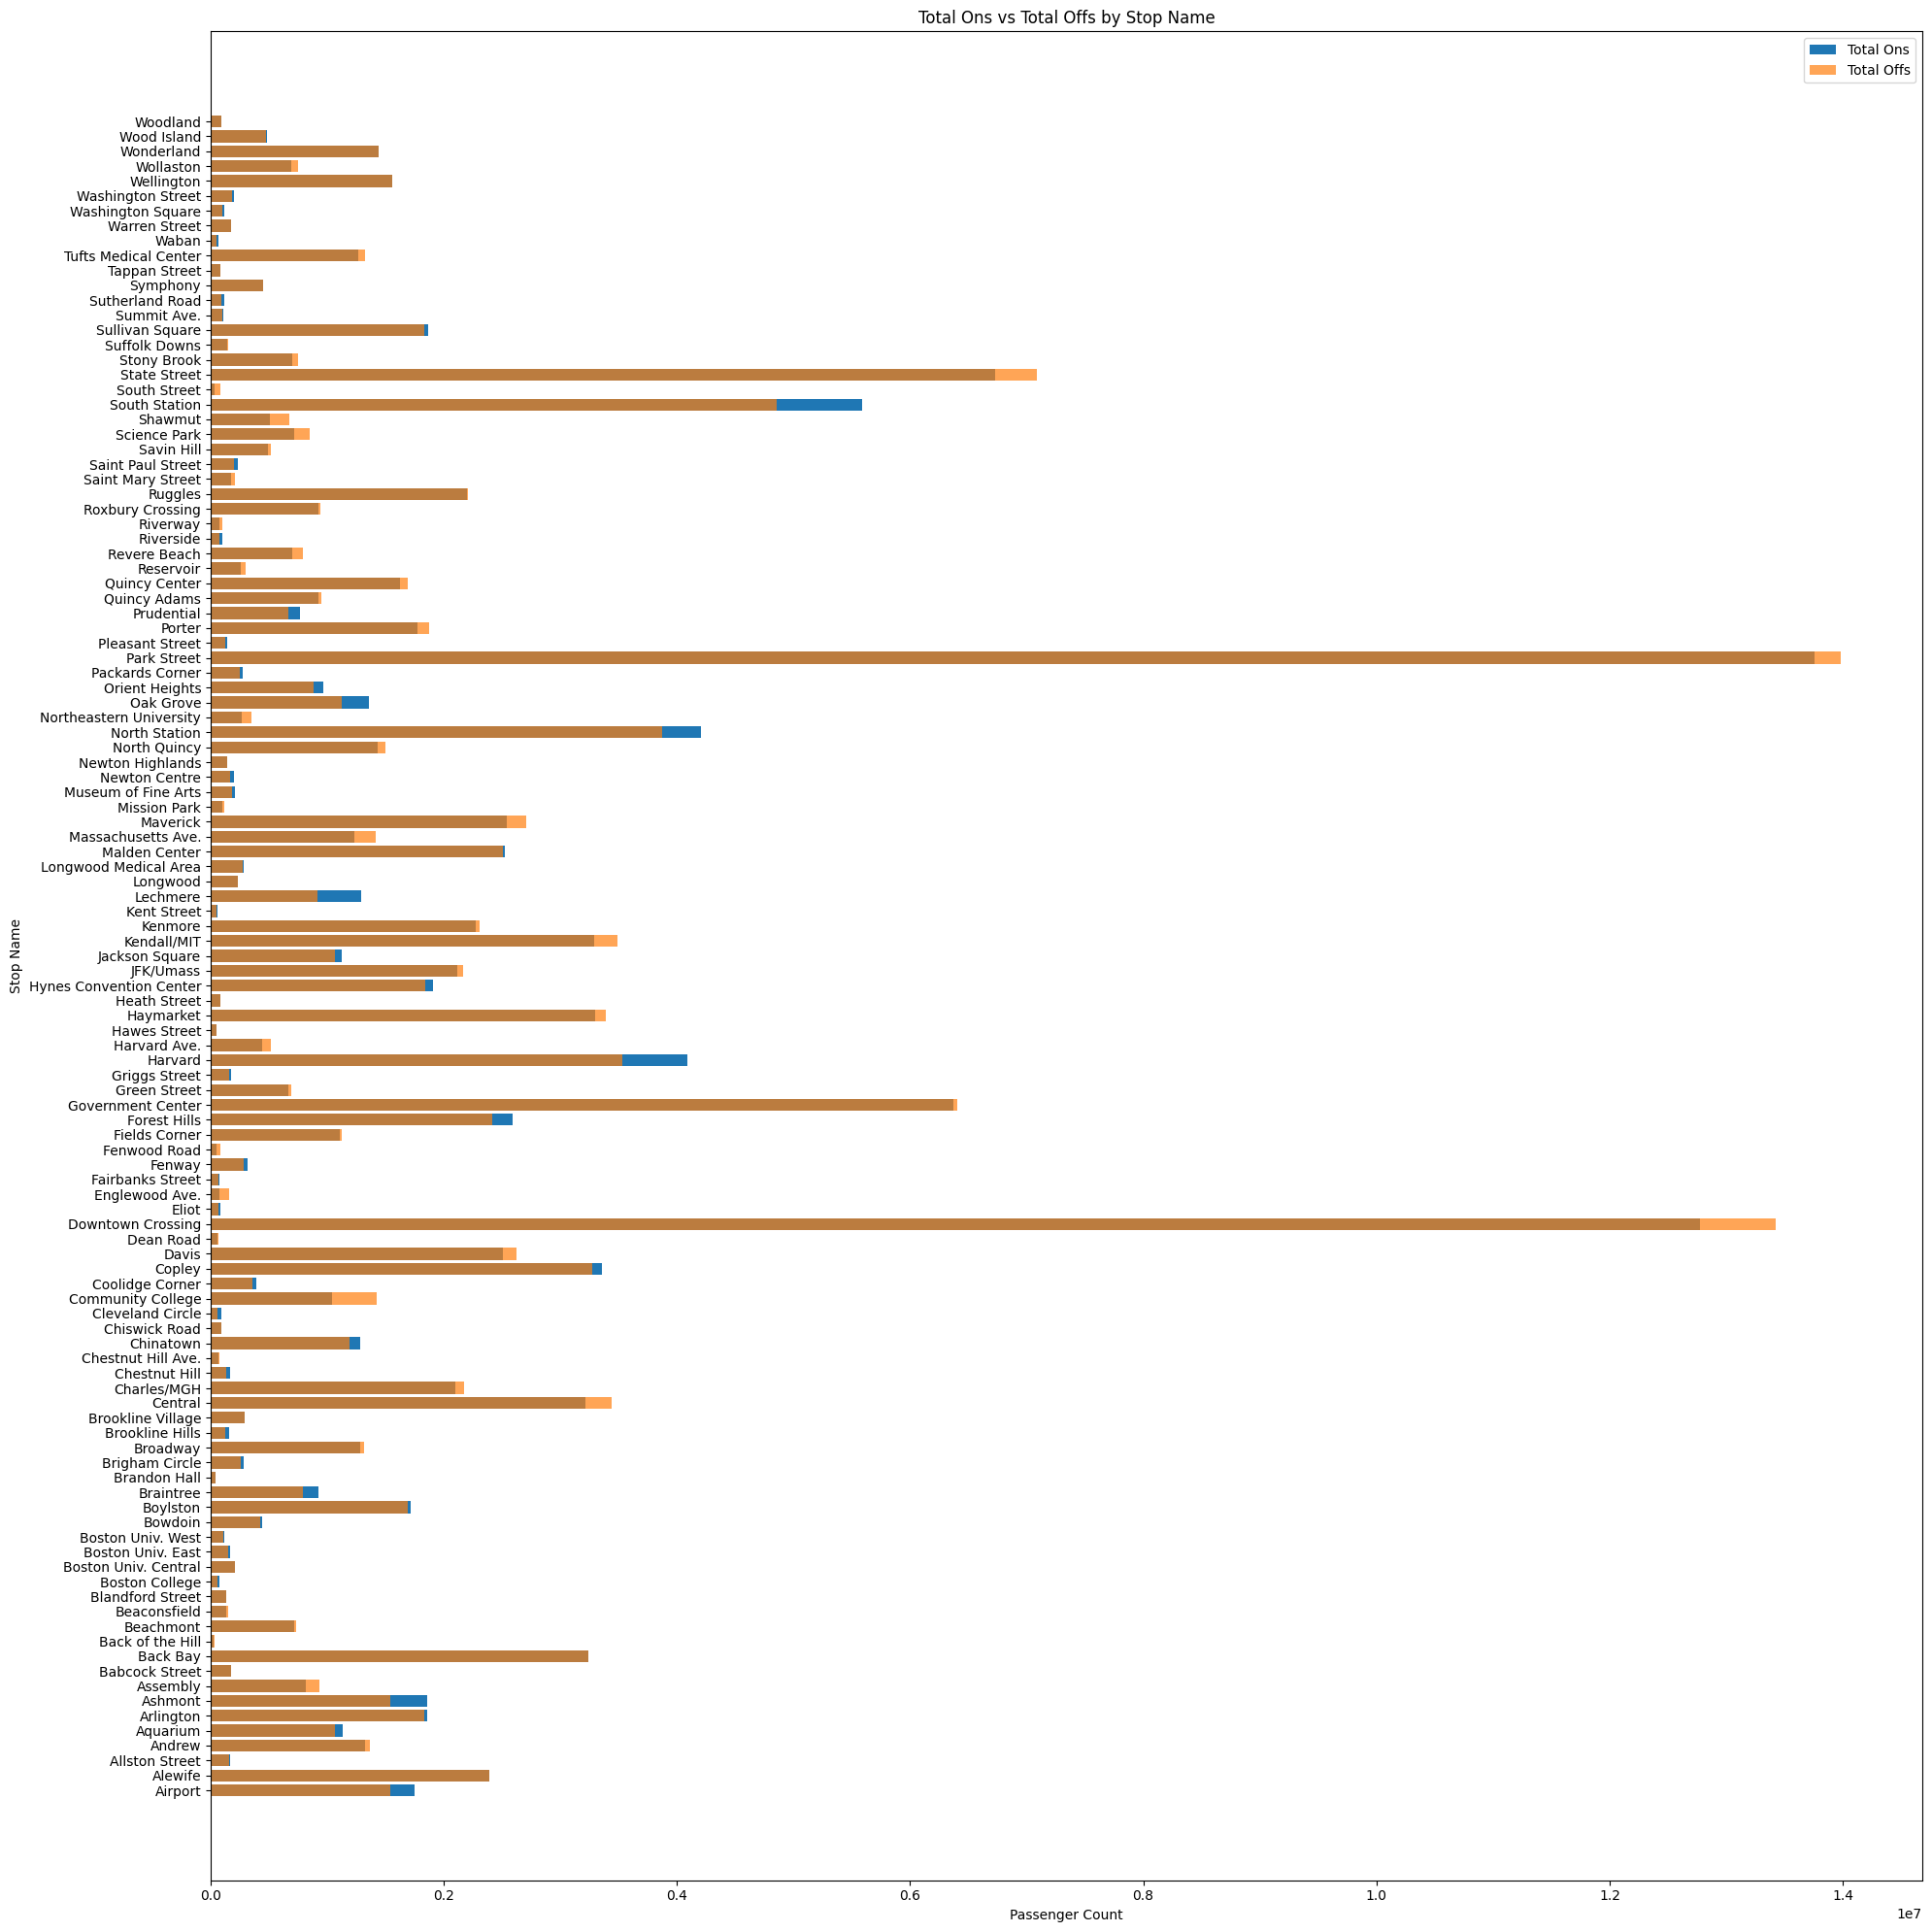

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load MBTA rail passenger data
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')  # Replace 'your_mbta_data.csv' with your file path

# Grouping by stop_name and aggregating total_ons and total_offs
grouped_data = mbta_data.groupby('stop_name').agg({'total_ons': 'sum', 'total_offs': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(20, 20))  # Adjust figure size here

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_ons'][:frame + 1], label='Total Ons')
    ax.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_offs'][:frame + 1], label='Total Offs', alpha=0.7)
    ax.legend()
    ax.set_xlabel('Passenger Count')
    ax.set_ylabel('Stop Name')
    ax.set_title(f'Total Ons vs Total Offs by Stop Name')
    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_ons_vs_total_offs_by_stop.gif', writer='pillow', fps=5)

# Display the plot (optional)
plt.show()


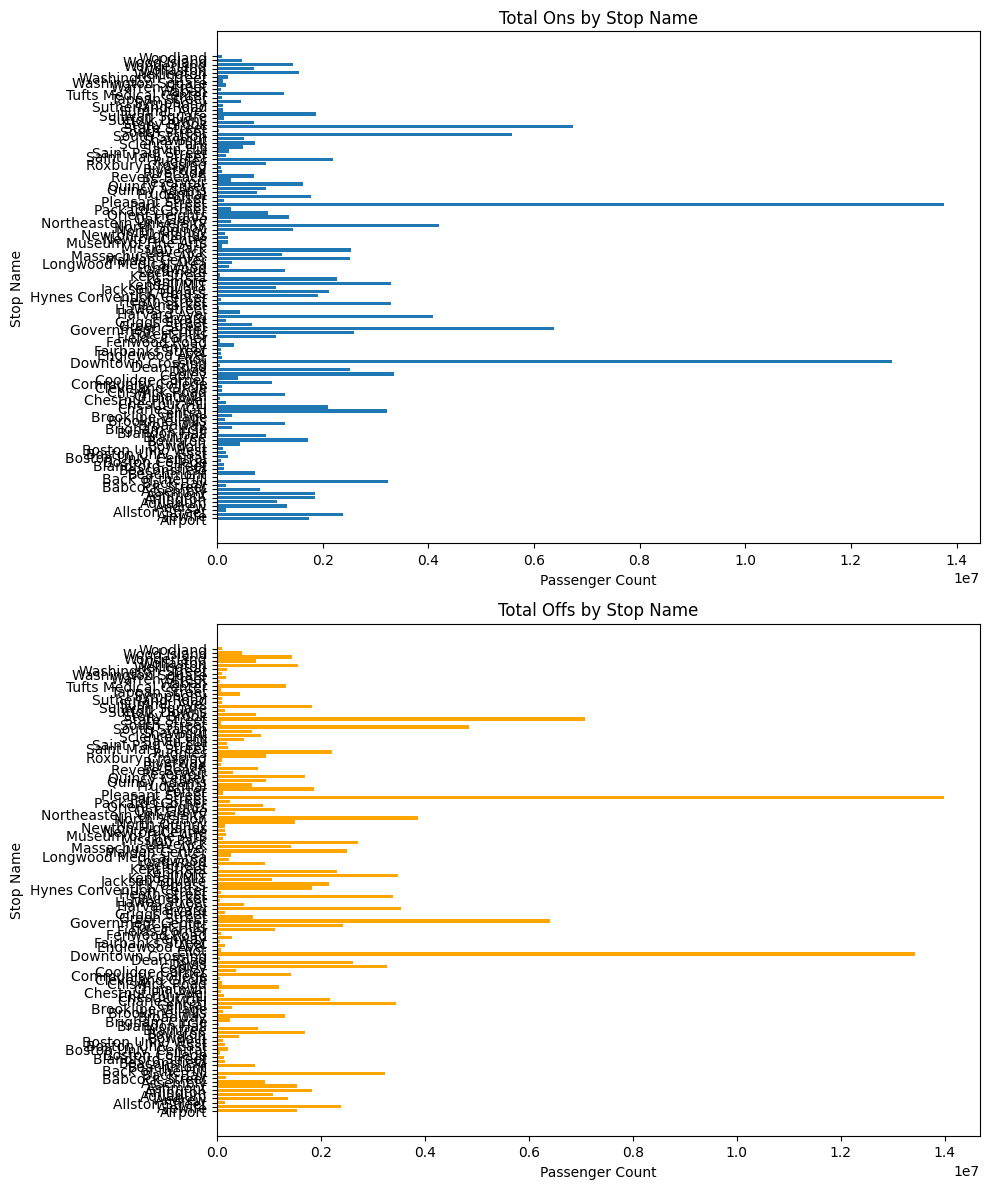

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load MBTA rail passenger data
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')  # Replace 'your_mbta_data.csv' with your file path

# Grouping by stop_name and aggregating total_ons and total_offs
grouped_data = mbta_data.groupby('stop_name').agg({'total_ons': 'sum', 'total_offs': 'sum'}).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Two subplots, one above the other

# Function to update the plot for each frame in the animation
def update(frame):
    ax1.clear()
    ax1.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_ons'][:frame + 1], label='Total Ons')
    ax1.set_xlabel('Passenger Count')
    ax1.set_ylabel('Stop Name')
    ax1.set_title('Total Ons by Stop Name')

    ax2.clear()
    ax2.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_offs'][:frame + 1], label='Total Offs', color='orange')
    ax2.set_xlabel('Passenger Count')
    ax2.set_ylabel('Stop Name')
    ax2.set_title('Total Offs by Stop Name')

    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_ons_and_offs_separate_plots.gif', writer='pillow', fps=5)

# Display the plot (optional)
plt.show()


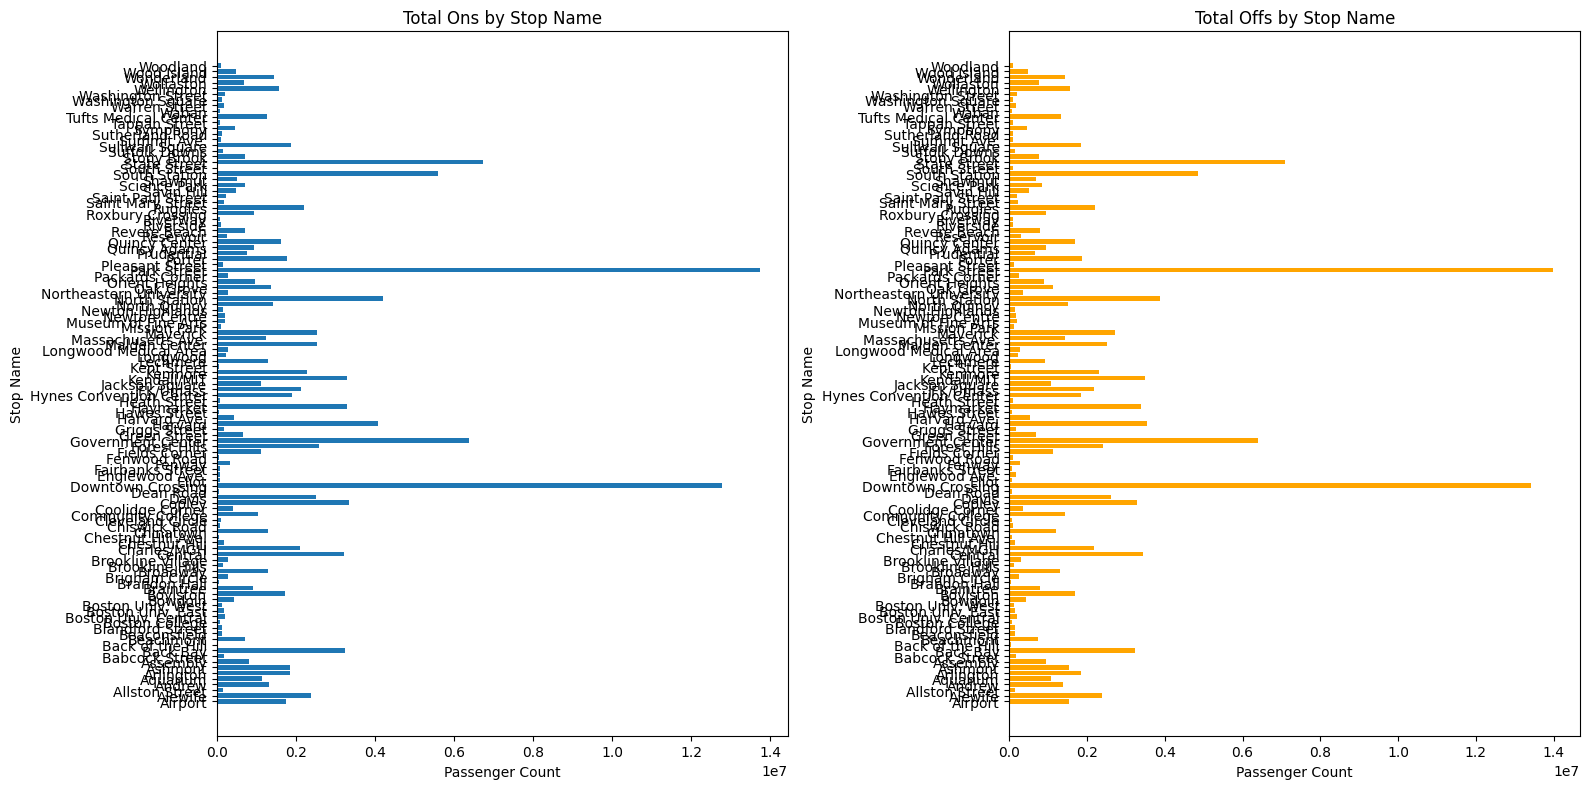

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load MBTA rail passenger data
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')  # Replace 'your_mbta_data.csv' with your file path

# Grouping by stop_name and aggregating total_ons and total_offs
grouped_data = mbta_data.groupby('stop_name').agg({'total_ons': 'sum', 'total_offs': 'sum'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Two subplots side-by-side

# Function to update the plot for each frame in the animation
def update(frame):
    ax1.clear()
    ax1.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_ons'][:frame + 1], label='Total Ons')
    ax1.set_xlabel('Passenger Count')
    ax1.set_ylabel('Stop Name')
    ax1.set_title('Total Ons by Stop Name')

    ax2.clear()
    ax2.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_offs'][:frame + 1], label='Total Offs', color='orange')
    ax2.set_xlabel('Passenger Count')
    ax2.set_ylabel('Stop Name')
    ax2.set_title('Total Offs by Stop Name')

    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_ons_and_offs_separate_plots.gif', writer='pillow', fps=5)

# Display the plot (optional)
plt.show()


In [ ]:
import csv
from itertools import chain
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

In [ ]:
mbta_data = pd.read_csv('/content/MBTA_DATA.csv')

edge = pd.read_csv('/content/Edge_CSV.csv')

node = pd.read_csv('/content/Node_CSV.csv')


In [ ]:
mbta_data

FID  mode     season route_id  route_name  direction_id  day_type_id  \
0        1     0  Fall 2019    Green  Green Line             0  day_type_01   
1        2     0  Fall 2019    Green  Green Line             0  day_type_01   
2        3     0  Fall 2019    Green  Green Line             0  day_type_01   
3        4     0  Fall 2019    Green  Green Line             0  day_type_01   
4        5     0  Fall 2019    Green  Green Line             0  day_type_01   
...    ...   ...        ...      ...         ...           ...          ...   
7915  7916     1  Fall 2017      Red    Red Line             0  day_type_02   
7916  7917     1  Fall 2017      Red    Red Line             0  day_type_02   
7917  7918     1  Fall 2017      Red    Red Line             0  day_type_02   
7918  7919     1  Fall 2017      Red    Red Line             0  day_type_02   
7919  7920     1  Fall 2017      Red    Red Line             0  day_type_02   

     day_type_name  time_period_id    time_period_name         stop_name  \
0          weekday  time_period_01  VERY_EARLY_MORNING    Allston Street   
1          weekday  time_period_01  VERY_EARLY_MORNING         Arlington   
2          weekday  time_period_01  VERY_EARLY_MORNING    Babcock Street   
3          weekday  time_period_01  VERY_EARLY_MORNING  Back of the Hill   
4          weekday  time_period_01  VERY_EARLY_MORNING      Beaconsfield   
...            ...             ...                 ...               ...   
7915      saturday  time_period_10            OFF_PEAK            Porter   
7916      saturday  time_period_10            OFF_PEAK      Quincy Adams   
7917      saturday  time_period_10            OFF_PEAK     Quincy Center   
7918      saturday  time_period_10            OFF_PEAK        Savin Hill   
7919      saturday  time_period_10            OFF_PEAK           Shawmut   

          stop_id  total_ons  total_offs  number_service_days  average_ons  \
0     place-alsgr          0          17                   77            0   
1     place-armnl       2675        8021                   77           35   
2     place-babck          0         151                   77            0   
3     place-bckhl          0          36                   77            0   
4     place-bcnfd         12          67                   77            0   
...           ...        ...         ...                  ...          ...   
7915  place-portr      59366        9940                   16         3710   
7916  place-qamnl        388       26507                   16           24   
7917  place-qnctr       2128       67000                   16          133   
7918  place-shmnl       2292       18338                   16          143   
7919  place-smmnl        657       28253                   16           41   

      average_offs  average_flow  
0                0             4  
1              104           381  
2                2             8  
3                0             4  
4                1            44  
...            ...           ...  
7915           621         13842  
7916          1657          1549  
7917          4188          3182  
7918          1146          7237  
7919          1766          3361  

[7920 rows x 18 columns]

In [ ]:
node

ID       stop_name        Lat        Lon
0      1         Airport -71.030238  42.374328
1      2         Alewife -71.142478  42.395426
2      3  Allston Street -71.138017  42.348725
3      4          Andrew -71.057656  42.330153
4      5        Aquarium -71.051590  42.359793
..   ...             ...        ...        ...
109  110      Wellington -71.077145  42.401668
110  111       Wollaston -71.020514  42.266769
111  112      Wonderland -70.991600  42.413643
112  113     Wood Island -71.022898  42.379609
113  114        Woodland -71.243367  42.332903

[114 rows x 4 columns]

In [ ]:
merged_df = pd.merge(mbta_data, node, on='stop_name', how='inner')

In [ ]:
merged_df

FID  mode     season route_id  route_name  direction_id  day_type_id  \
0        1     0  Fall 2019    Green  Green Line             0  day_type_01   
1       82     0  Fall 2019    Green  Green Line             0  day_type_01   
2      115     0  Fall 2019    Green  Green Line             0  day_type_01   
3      183     0  Fall 2019    Green  Green Line             0  day_type_01   
4      248     0  Fall 2019    Green  Green Line             0  day_type_01   
...    ...   ...        ...      ...         ...           ...          ...   
7915  7790     1  Fall 2017      Red    Red Line             1  day_type_01   
7916  7805     1  Fall 2017      Red    Red Line             1  day_type_01   
7917  7844     1  Fall 2017      Red    Red Line             1  day_type_01   
7918  7870     1  Fall 2017      Red    Red Line             1  day_type_03   
7919  7902     1  Fall 2017      Red    Red Line             0  day_type_02   

     day_type_name  time_period_id    time_period_name  ...      stop_id  \
0          weekday  time_period_01  VERY_EARLY_MORNING  ...  place-alsgr   
1          weekday  time_period_06             PM_PEAK  ...  place-alsgr   
2          weekday  time_period_05       MIDDAY_SCHOOL  ...  place-alsgr   
3          weekday  time_period_03             AM_PEAK  ...  place-alsgr   
4          weekday  time_period_07             EVENING  ...  place-alsgr   
...            ...             ...                 ...  ...          ...   
7915       weekday  time_period_09               NIGHT  ...  place-andrw   
7916       weekday  time_period_03             AM_PEAK  ...  place-andrw   
7917       weekday  time_period_04         MIDDAY_BASE  ...  place-andrw   
7918        sunday  time_period_11            OFF_PEAK  ...  place-andrw   
7919      saturday  time_period_10            OFF_PEAK  ...  place-andrw   

     total_ons  total_offs  number_service_days  average_ons  average_offs  \
0            0          17                   77            0             0   
1          978        9838                   77           13           128   
2          706        4528                   77            9            59   
3         1028         818                   77           13            11   
4          745        9213                   77           10           120   
...        ...         ...                  ...          ...           ...   
7915       727         507                   82            9             6   
7916    108239       37135                   82         1320           453   
7917     88856       31007                   82         1084           378   
7918     29606       14974                   17         1742           881   
7919     18504       43113                   16         1157          2695   

      average_flow  ID        Lat        Lon  
0                4   3 -71.138017  42.348725  
1              532   3 -71.138017  42.348725  
2              263   3 -71.138017  42.348725  
3              125   3 -71.138017  42.348725  
4              467   3 -71.138017  42.348725  
...            ...  ..        ...        ...  
7915            55   4 -71.057656  42.330153  
7916         16858   4 -71.057656  42.330153  
7917         11198   4 -71.057656  42.330153  
7918         15716   4 -71.057656  42.330153  
7919         20711   4 -71.057656  42.330153  

[7920 rows x 21 columns]

In [ ]:
x = merged_df['stop_name'].unique()

In [ ]:
x1 = sorted(x)

In [ ]:
len(x1)

114

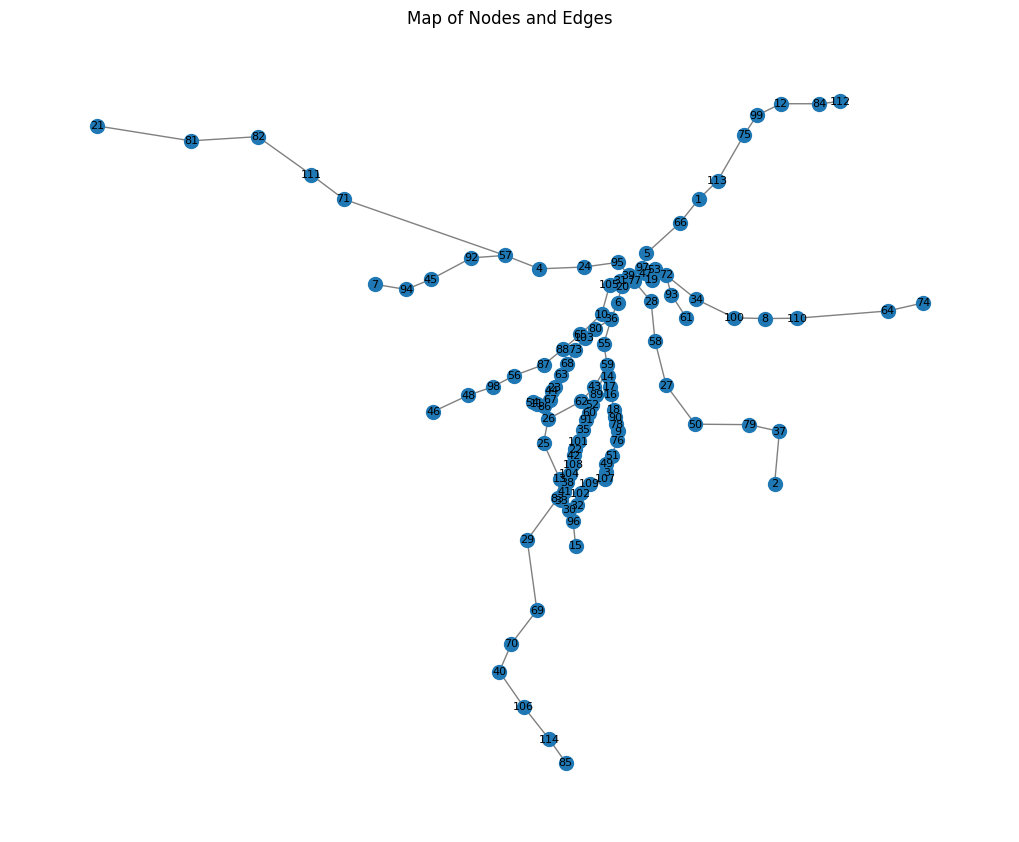

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reading nodes and edges data from CSV files
nodes_df = pd.read_csv('/content/Node_CSV.csv')  # Replace 'nodes.csv' with your actual nodes file
edges_df = pd.read_csv('/content/Edge_CSV.csv')  # Replace 'edges.csv' with your actual edges file

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with their attributes (latitude, longitude, ID, etc.)
for index, row in nodes_df.iterrows():
    G.add_node(row['ID'], stop_name=row['stop_name'], pos=(row['Lon'], row['Lat']))

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Get node positions for plotting
node_positions = {node: data['pos'] for node, data in G.nodes(data=True)}

# Plotting the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos=node_positions, with_labels=True, node_size=100, font_size=8, font_color='black', edge_color='gray')
plt.title('Map of Nodes and Edges')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


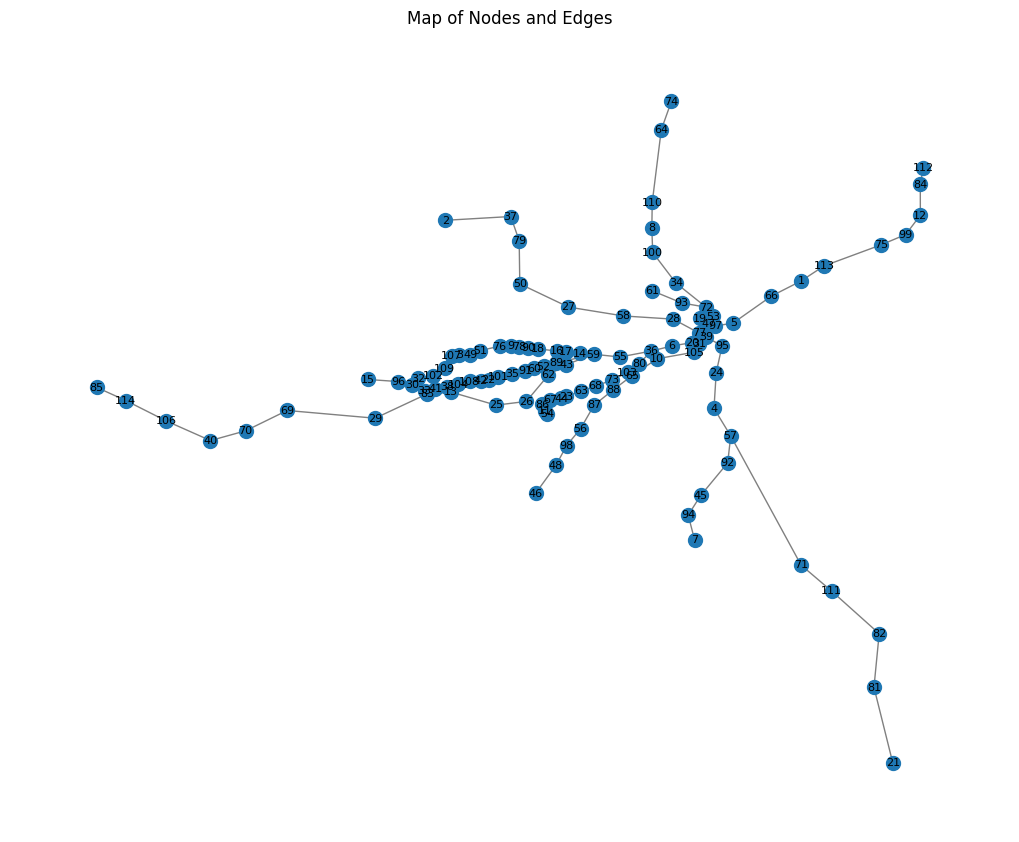

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reading nodes and edges data from CSV files
nodes_df = pd.read_csv('/content/Node_CSV.csv')  # Replace 'nodes.csv' with your actual nodes file
edges_df = pd.read_csv('/content/Edge_CSV.csv')  # Replace 'edges.csv' with your actual edges file

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with their attributes (latitude, longitude, ID, etc.)
for index, row in nodes_df.iterrows():
    G.add_node(row['ID'], stop_name=row['stop_name'], pos=(row['Lat'], row['Lon']))  # Swap lat and long here

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Get node positions for plotting
node_positions = {node: data['pos'] for node, data in G.nodes(data=True)}

# Plotting the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos=node_positions, with_labels=True, node_size=100, font_size=8, font_color='black', edge_color='gray')
plt.title('Map of Nodes and Edges')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


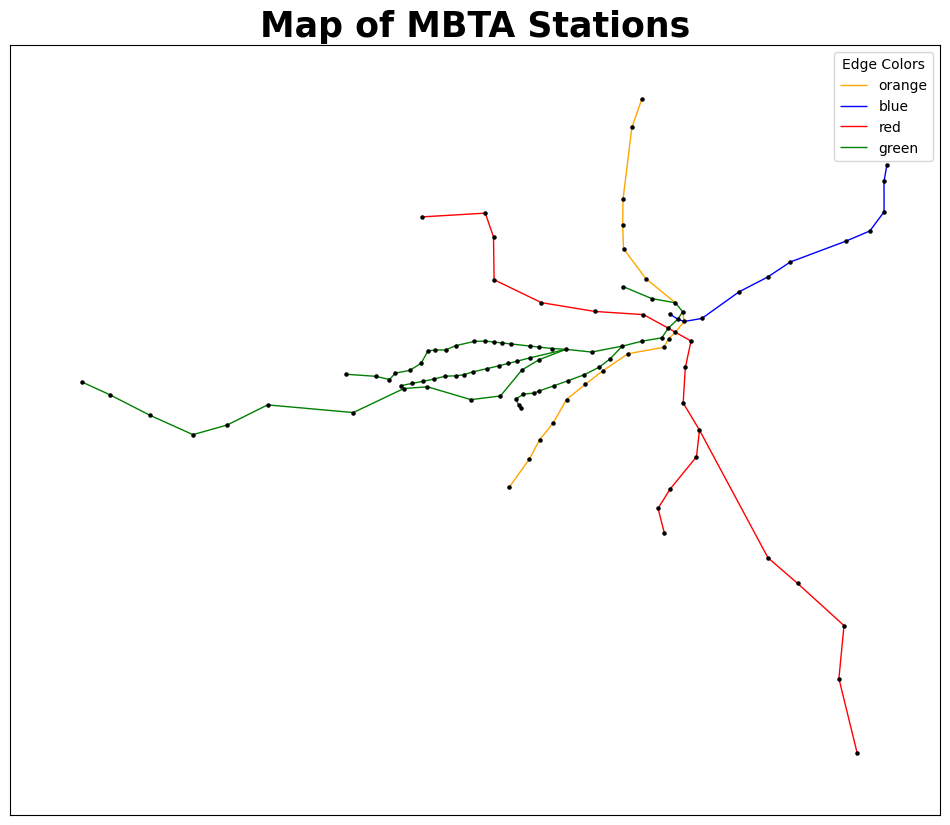

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reading nodes and edges data from CSV files
nodes_df = pd.read_csv('/content/Node_CSV.csv')  # Replace with your actual nodes file path
edges_df = pd.read_csv('/content/Edge_CSV.csv')  # Replace with your actual edges file path

# Define a mapping from line descriptions to Matplotlib colors
color_mapping = {
    'Orange Line': 'orange',
    'Blue Line': 'blue',
    'Red Line': 'red',
    'Green Line': 'green',
    # Add more color mappings as needed
}

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with their attributes (latitude, longitude, ID, etc.)
for index, row in nodes_df.iterrows():
    G.add_node(row['ID'], stop_name=row['stop_name'], pos=(row['Lat'], row['Lon']))  # Swap lat and long here

# Add edges to the graph with colors based on the 'color of lines' column
for index, row in edges_df.iterrows():
    edge_color = color_mapping.get(row['Line'], 'black')  # Default to black if color not found in mapping
    G.add_edge(row['Source'], row['Target'], color=edge_color)

# Get node positions for plotting
node_positions = {node: data['pos'] for node, data in G.nodes(data=True)}

# Plotting the graph with different edge colors
plt.figure(figsize=(12, 10))

# Draw edges with respective colors based on the mapping
for color in color_mapping.values():
    edges_subset = [(u, v) for (u, v, d) in G.edges(data=True) if d['color'] == color]
    nx.draw_networkx_edges(G, pos=node_positions, edgelist=edges_subset, edge_color=color, width=1.0, label=color)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos=node_positions, node_color = 'black',node_size=5)
# nx.draw_networkx_labels(G, pos=node_positions, font_size=8, font_color='black')

plt.title('Map of MBTA Stations',fontsize=25,fontweight='bold')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
plt.legend(title='Edge Colors')
plt.show()


In [ ]:
print(merged_df.columns)


Index(['FID', 'mode', 'season', 'route_id', 'route_name', 'direction_id',
       'day_type_id', 'day_type_name', 'time_period_id', 'time_period_name',
       'stop_name', 'stop_id', 'total_ons', 'total_offs',
       'number_service_days', 'average_ons', 'average_offs', 'average_flow',
       'ID', 'Lat', 'Lon'],
      dtype='object')


In [ ]:
new_df = merged_df[['season', 'day_type_name', 'time_period_name','stop_name', 'total_ons', 'total_offs', 'ID', 'Lat', 'Lon']].copy()


In [ ]:
new_df

season day_type_name    time_period_name       stop_name  total_ons  \
0     Fall 2019       weekday  VERY_EARLY_MORNING  Allston Street          0   
1     Fall 2019       weekday             PM_PEAK  Allston Street        978   
2     Fall 2019       weekday       MIDDAY_SCHOOL  Allston Street        706   
3     Fall 2019       weekday             AM_PEAK  Allston Street       1028   
4     Fall 2019       weekday             EVENING  Allston Street        745   
...         ...           ...                 ...             ...        ...   
7915  Fall 2017       weekday               NIGHT          Andrew        727   
7916  Fall 2017       weekday             AM_PEAK          Andrew     108239   
7917  Fall 2017       weekday         MIDDAY_BASE          Andrew      88856   
7918  Fall 2017        sunday            OFF_PEAK          Andrew      29606   
7919  Fall 2017      saturday            OFF_PEAK          Andrew      18504   

      total_offs  ID        Lat        Lon  
0             17   3 -71.138017  42.348725  
1           9838   3 -71.138017  42.348725  
2           4528   3 -71.138017  42.348725  
3            818   3 -71.138017  42.348725  
4           9213   3 -71.138017  42.348725  
...          ...  ..        ...        ...  
7915         507   4 -71.057656  42.330153  
7916       37135   4 -71.057656  42.330153  
7917       31007   4 -71.057656  42.330153  
7918       14974   4 -71.057656  42.330153  
7919       43113   4 -71.057656  42.330153  

[7920 rows x 9 columns]

In [ ]:
fall_2019_df = new_df[new_df['season'] == 'Fall 2019']


In [ ]:
fall_2019_df

season day_type_name    time_period_name       stop_name  total_ons  \
0     Fall 2019       weekday  VERY_EARLY_MORNING  Allston Street          0   
1     Fall 2019       weekday             PM_PEAK  Allston Street        978   
2     Fall 2019       weekday       MIDDAY_SCHOOL  Allston Street        706   
3     Fall 2019       weekday             AM_PEAK  Allston Street       1028   
4     Fall 2019       weekday             EVENING  Allston Street        745   
...         ...           ...                 ...             ...        ...   
7871  Fall 2019       weekday             PM_PEAK          Andrew      42037   
7872  Fall 2019       weekday            EARLY_AM          Andrew      28326   
7873  Fall 2019       weekday               NIGHT          Andrew       1080   
7874  Fall 2019       weekday             EVENING          Andrew      20013   
7875  Fall 2019       weekday             AM_PEAK          Andrew     102423   

      total_offs  ID        Lat        Lon  
0             17   3 -71.138017  42.348725  
1           9838   3 -71.138017  42.348725  
2           4528   3 -71.138017  42.348725  
3            818   3 -71.138017  42.348725  
4           9213   3 -71.138017  42.348725  
...          ...  ..        ...        ...  
7871       20536   4 -71.057656  42.330153  
7872       22273   4 -71.057656  42.330153  
7873        2548   4 -71.057656  42.330153  
7874       11973   4 -71.057656  42.330153  
7875       30032   4 -71.057656  42.330153  

[2640 rows x 9 columns]

In [ ]:
fall_2019_df['total_passengers'] = fall_2019_df['total_ons'] + fall_2019_df['total_offs']

# Dropping the 'total_ons' and 'total_offs' columns
fall_2019_df.drop(['total_ons', 'total_offs'], axis=1, inplace=True)

<ipython-input-52-a9afc0b57b17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df['total_passengers'] = fall_2019_df['total_ons'] + fall_2019_df['total_offs']
<ipython-input-52-a9afc0b57b17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df.drop(['total_ons', 'total_offs'], axis=1, inplace=True)


In [ ]:
fall_2019_df


season day_type_name    time_period_name       stop_name  ID  \
0     Fall 2019       weekday  VERY_EARLY_MORNING  Allston Street   3   
1     Fall 2019       weekday             PM_PEAK  Allston Street   3   
2     Fall 2019       weekday       MIDDAY_SCHOOL  Allston Street   3   
3     Fall 2019       weekday             AM_PEAK  Allston Street   3   
4     Fall 2019       weekday             EVENING  Allston Street   3   
...         ...           ...                 ...             ...  ..   
7871  Fall 2019       weekday             PM_PEAK          Andrew   4   
7872  Fall 2019       weekday            EARLY_AM          Andrew   4   
7873  Fall 2019       weekday               NIGHT          Andrew   4   
7874  Fall 2019       weekday             EVENING          Andrew   4   
7875  Fall 2019       weekday             AM_PEAK          Andrew   4   

            Lat        Lon  total_passengers  
0    -71.138017  42.348725                17  
1    -71.138017  42.348725             10816  
2    -71.138017  42.348725              5234  
3    -71.138017  42.348725              1846  
4    -71.138017  42.348725              9958  
...         ...        ...               ...  
7871 -71.057656  42.330153             62573  
7872 -71.057656  42.330153             50599  
7873 -71.057656  42.330153              3628  
7874 -71.057656  42.330153             31986  
7875 -71.057656  42.330153            132455  

[2640 rows x 8 columns]

In [ ]:
grouped_df = fall_2019_df.groupby(['stop_name','day_type_name','time_period_name'], as_index=False)['total_passengers'].sum()

# Displaying the resulting DataFrame


In [ ]:
grouped_df

stop_name day_type_name    time_period_name  total_passengers
0      Airport      saturday            OFF_PEAK            128146
1      Airport        sunday            OFF_PEAK             76114
2      Airport       weekday             AM_PEAK            178085
3      Airport       weekday            EARLY_AM             66410
4      Airport       weekday             EVENING            159027
...        ...           ...                 ...               ...
1249  Woodland       weekday         MIDDAY_BASE              7944
1250  Woodland       weekday       MIDDAY_SCHOOL              5757
1251  Woodland       weekday               NIGHT                50
1252  Woodland       weekday             PM_PEAK              8483
1253  Woodland       weekday  VERY_EARLY_MORNING              1136

[1254 rows x 4 columns]

In [ ]:
merged_df_1 = pd.merge(grouped_df, node, on='stop_name', how='inner')

In [ ]:
merged_df_1

stop_name day_type_name    time_period_name  total_passengers   ID  \
0      Airport      saturday            OFF_PEAK            128146    1   
1      Airport        sunday            OFF_PEAK             76114    1   
2      Airport       weekday             AM_PEAK            178085    1   
3      Airport       weekday            EARLY_AM             66410    1   
4      Airport       weekday             EVENING            159027    1   
...        ...           ...                 ...               ...  ...   
1249  Woodland       weekday         MIDDAY_BASE              7944  114   
1250  Woodland       weekday       MIDDAY_SCHOOL              5757  114   
1251  Woodland       weekday               NIGHT                50  114   
1252  Woodland       weekday             PM_PEAK              8483  114   
1253  Woodland       weekday  VERY_EARLY_MORNING              1136  114   

            Lat        Lon  
0    -71.030238  42.374328  
1    -71.030238  42.374328  
2    -71.030238  42.374328  
3    -71.030238  42.374328  
4    -71.030238  42.374328  
...         ...        ...  
1249 -71.243367  42.332903  
1250 -71.243367  42.332903  
1251 -71.243367  42.332903  
1252 -71.243367  42.332903  
1253 -71.243367  42.332903  

[1254 rows x 7 columns]

In [ ]:
weekend_df = merged_df_1[(merged_df_1['day_type_name'] == 'weekday') & (merged_df_1['time_period_name'] == 'AM_PEAK')]


In [ ]:
weekend_df

stop_name day_type_name time_period_name  total_passengers   ID  \
2            Airport       weekday          AM_PEAK            178085    1   
13           Alewife       weekday          AM_PEAK            469097    2   
24    Allston Street       weekday          AM_PEAK             13503    3   
35            Andrew       weekday          AM_PEAK            173663    4   
46          Aquarium       weekday          AM_PEAK            149417    5   
...              ...           ...              ...               ...  ...   
1201      Wellington       weekday          AM_PEAK            244742  110   
1212       Wollaston       weekday          AM_PEAK            112813  111   
1223      Wonderland       weekday          AM_PEAK            209952  112   
1234     Wood Island       weekday          AM_PEAK             56954  113   
1245        Woodland       weekday          AM_PEAK              7943  114   

            Lat        Lon  
2    -71.030238  42.374328  
13   -71.142478  42.395426  
24   -71.138017  42.348725  
35   -71.057656  42.330153  
46   -71.051590  42.359793  
...         ...        ...  
1201 -71.077145  42.401668  
1212 -71.020514  42.266769  
1223 -70.991600  42.413643  
1234 -71.022898  42.379609  
1245 -71.243367  42.332903  

[114 rows x 7 columns]

In [ ]:
# def min_max_normalize(column):
#     min_val = column.min()
#     max_val = column.max()
#     normalized = ((column - min_val) / (max_val - min_val)) * 100 + 1  # Scale between 1 and 10
#     return normalized

# # Normalizing 'total_passenger' between 1 and 10
# weekend_df['normalized_passengers'] = min_max_normalize(weekend_df['total_passengers'])

In [ ]:
weekend_df

stop_name day_type_name time_period_name  total_passengers   ID  \
2            Airport       weekday          AM_PEAK            178085    1   
13           Alewife       weekday          AM_PEAK            469097    2   
24    Allston Street       weekday          AM_PEAK             13503    3   
35            Andrew       weekday          AM_PEAK            173663    4   
46          Aquarium       weekday          AM_PEAK            149417    5   
...              ...           ...              ...               ...  ...   
1201      Wellington       weekday          AM_PEAK            244742  110   
1212       Wollaston       weekday          AM_PEAK            112813  111   
1223      Wonderland       weekday          AM_PEAK            209952  112   
1234     Wood Island       weekday          AM_PEAK             56954  113   
1245        Woodland       weekday          AM_PEAK              7943  114   

            Lat        Lon  
2    -71.030238  42.374328  
13   -71.142478  42.395426  
24   -71.138017  42.348725  
35   -71.057656  42.330153  
46   -71.051590  42.359793  
...         ...        ...  
1201 -71.077145  42.401668  
1212 -71.020514  42.266769  
1223 -70.991600  42.413643  
1234 -71.022898  42.379609  
1245 -71.243367  42.332903  

[114 rows x 7 columns]

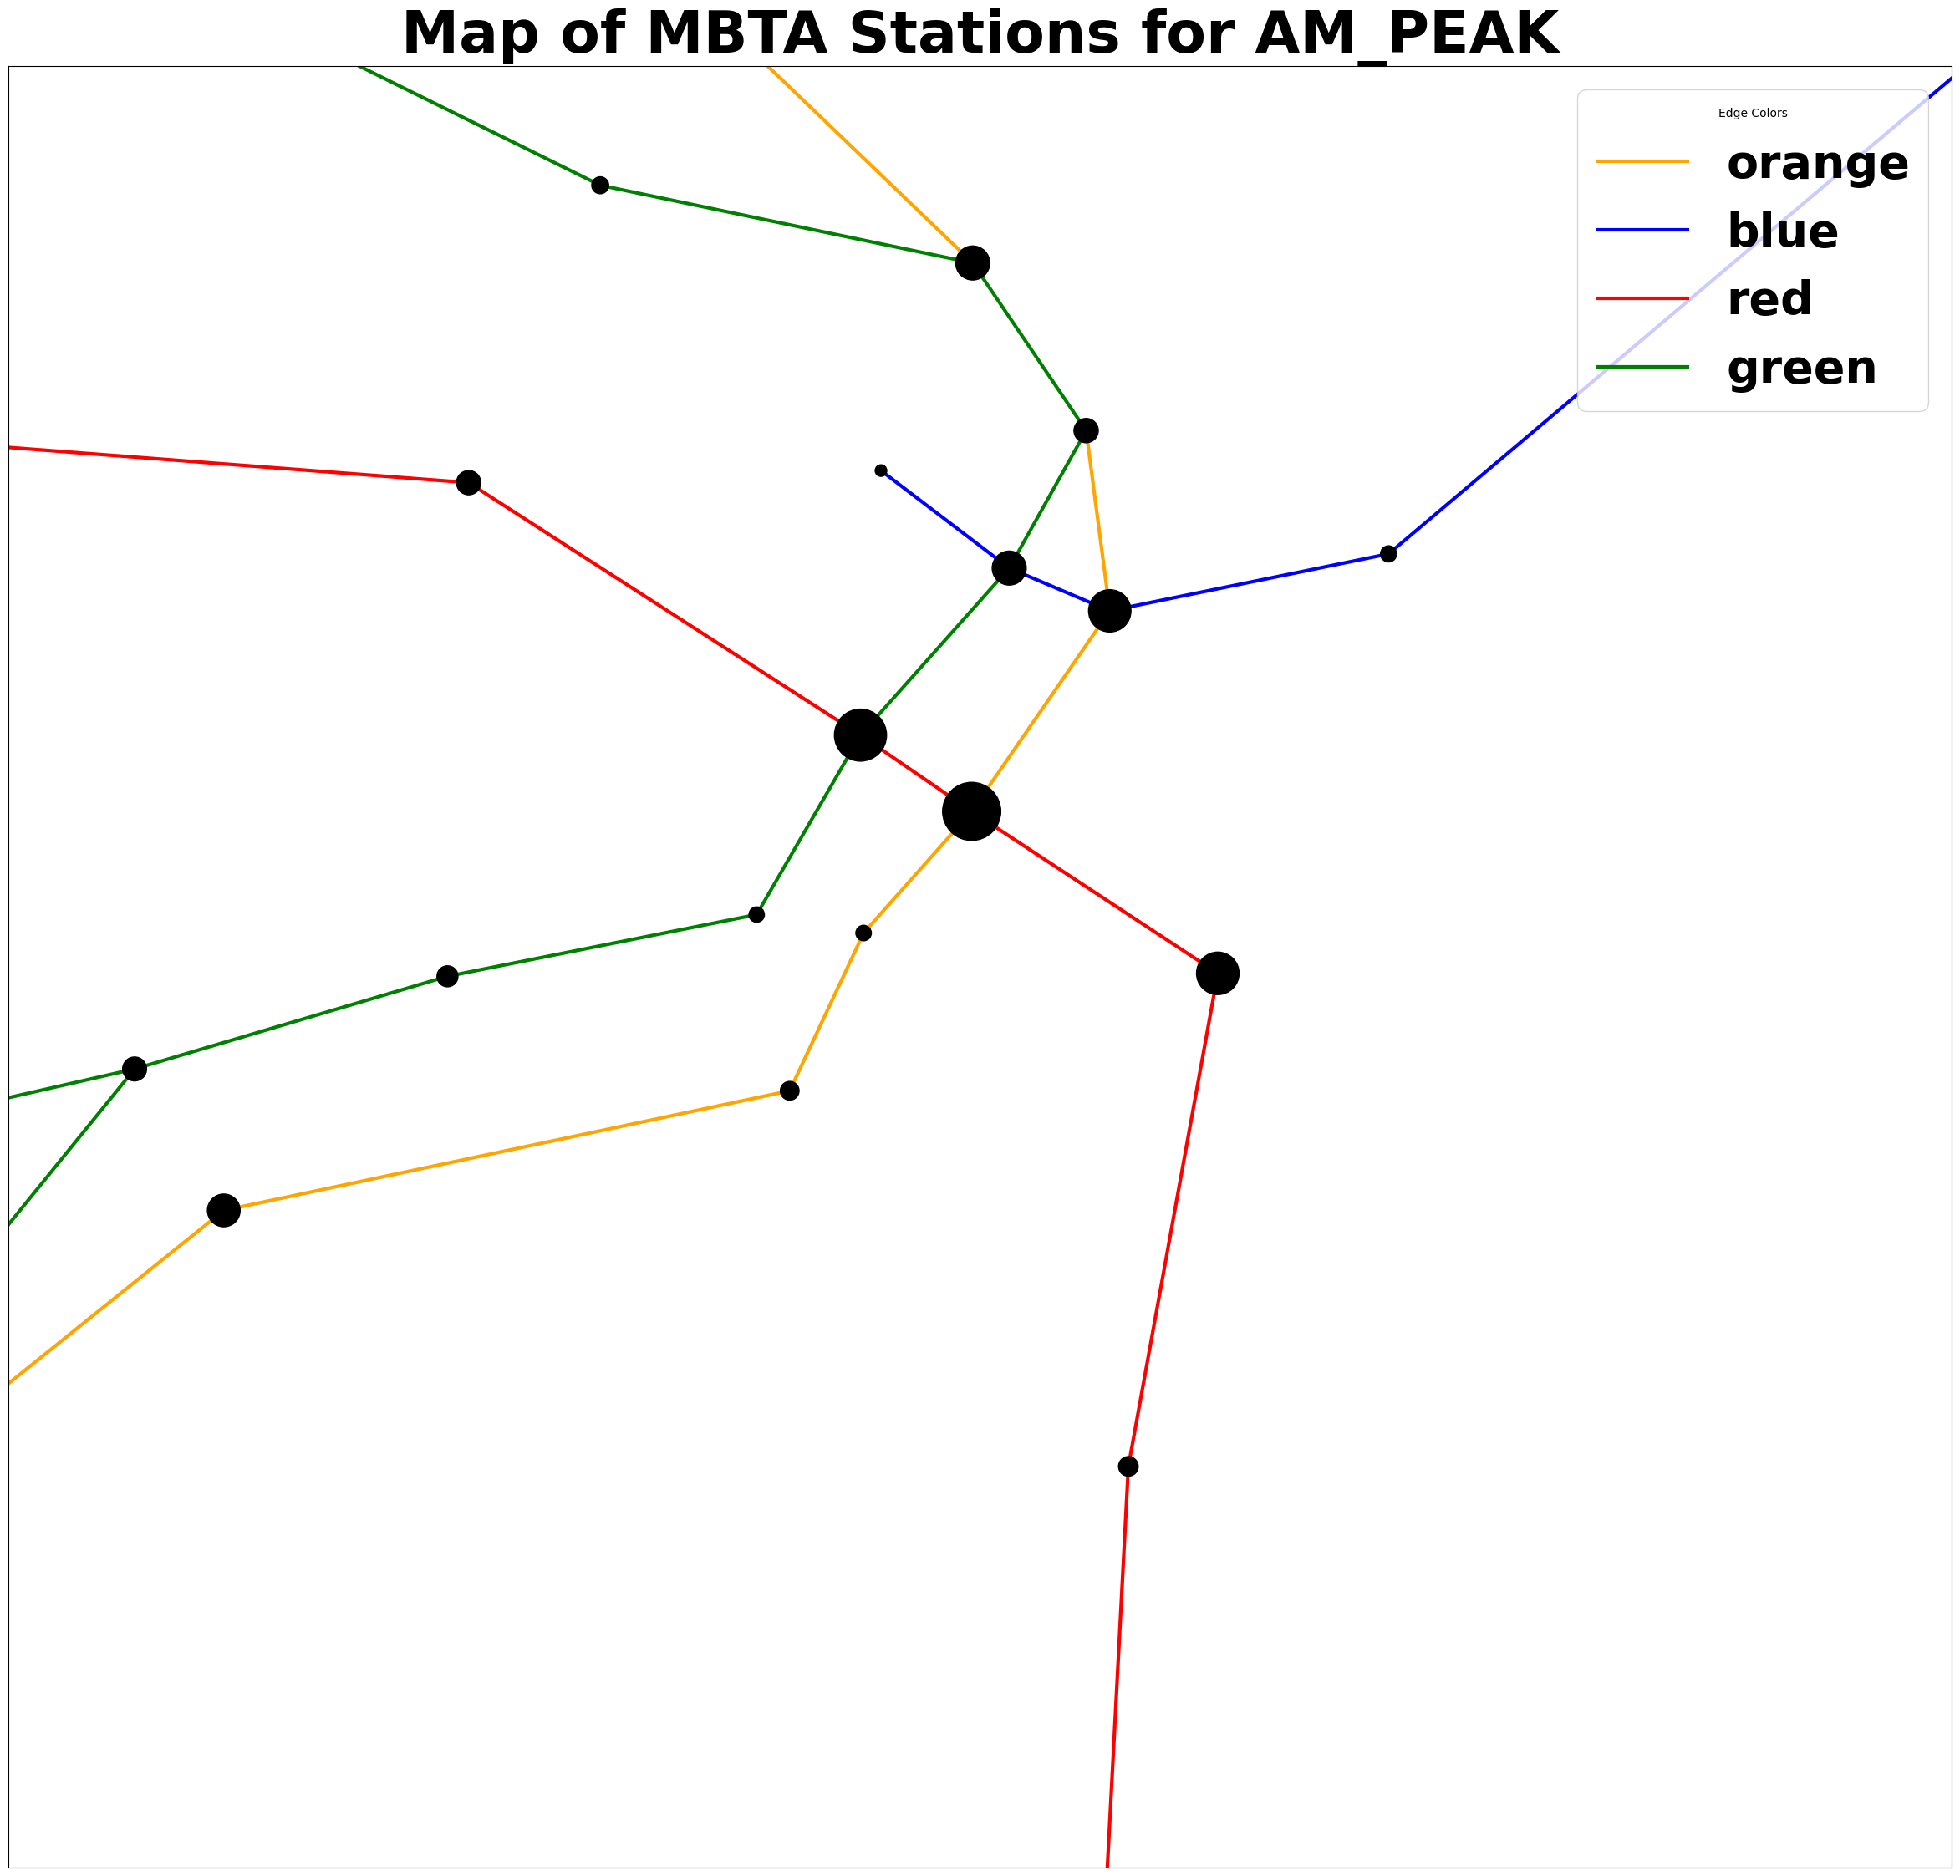

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reading nodes and edges data from CSV files
nodes_df = weekend_df  # Replace with your actual nodes file path
edges_df = pd.read_csv('/content/Edge_CSV.csv')  # Replace with your actual edges file path

# Define a mapping from line descriptions to Matplotlib colors
color_mapping = {
    'Orange Line': 'orange',
    'Blue Line': 'blue',
    'Red Line': 'red',
    'Green Line': 'green',
    # Add more color mappings as needed
}

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with their attributes (latitude, longitude, ID, etc.)
for index, row in nodes_df.iterrows():
    G.add_node(row['ID'], stop_name=row['stop_name'], pos=(row['Lat'], row['Lon']), total_passengers=row['total_passengers'])  # Swap lat and long here

# Add edges to the graph with colors based on the 'color of lines' column
for index, row in edges_df.iterrows():
    edge_color = color_mapping.get(row['Line'], 'black')  # Default to black if color not found in mapping
    G.add_edge(row['Source'], row['Target'], color=edge_color)

# Get node positions for plotting
node_positions = {node: data['pos'] for node, data in G.nodes(data=True)}

# Get node sizes based on 'total_passengers' column (normalized between 50 and 500 for example)
min_passengers = nodes_df['total_passengers'].min()
max_passengers = nodes_df['total_passengers'].max()

# Normalize node sizes between 50 and 500
node_sizes = [10+2500 * ((G.nodes[node]['total_passengers'] - min_passengers) / (max_passengers - min_passengers)) for node in G.nodes]

# Plotting the graph with different edge colors, node sizes based on 'total_passengers', and customized node and edge styles
plt.figure(figsize=(30, 28))

# Draw edges with respective colors based on the mapping and reduced edge width
for color in color_mapping.values():
    edges_subset = [(u, v) for (u, v, d) in G.edges(data=True) if d['color'] == color]
    nx.draw_networkx_edges(G, pos=node_positions, edgelist=edges_subset, edge_color=color, width=3.0, label=color)

# Draw nodes and labels with black color and variable node sizes
nx.draw_networkx_nodes(G, pos=node_positions, node_color='black', node_size=node_sizes)  # Change node_color here
# nx.draw_networkx_labels(G, pos=node_positions, font_size=8, font_color='black')

# min_lon = -71.2
# max_lon = -70.9916
# min_lat = 42.337267
# max_lat = 42.39

# min_lon = -71.10  # Adjust these values to zoom in further
# max_lon = -71.03  # Adjust these values to zoom in further
# min_lat = 42.34  # Adjust these values to zoom in further
# max_lat = 42.38  # Adjust these values to zoom in further

# Adjusting the longitude range to center the graph horizontally
min_lon = -71.08  # Decrease this value to zoom in towards the center horizontally
max_lon = -71.04  # Increase this value to zoom in towards the center horizontally

# Adjusting the latitude range to center the graph vertically
min_lat = 42.335  # Decrease this value to zoom in towards the center vertically
max_lat = 42.369  # Increase this value to zoom in towards the center vertically



# plt.title('Map of Nodes and Edges with Different Colors and Variable Sizes for FINAL_EARLY_AM')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.legend(title='Edge Colors')

plt.title('Map of MBTA Stations for AM_PEAK', fontsize=50, fontweight='bold')
# plt.xlabel('Latitude', fontsize=12, fontweight='bold')
# plt.ylabel('Longitude', fontsize=12, fontweight='bold')
plt.legend(title='Edge Colors', prop={'size': 40, 'weight': 'bold'})
# Set the limits for the x and y axes to zoom in on the specified area
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.savefig('AM_PEAK')
plt.show()




Minimum Latitude: -71.25249627
Maximum Latitude: -70.9916
Minimum Longitude: 42.207267
Maximum Longitude: 42.43668


In [ ]:
from PIL import Image
import imageio

# Paths to your EARLY_AM and AM_PEAK images
early_am_path = '/content/EARLY_AM.png'
am_peak_path = '/content/AM_PEAK.png'
evening_path = '/content/EVENING.png'
late_evening_path = '/content/LATE_EVENING.png'
midday_base_path = '/content/MIDDAY_BASE.png'
midday_school_path = '/content/MIDDAY_SCHOOL.png'
night_path = '/content/NIGHT.png'
pm_peak_path = '/content/PM_PEAK.png'
very_early_morning_path = '/content/VERY_EARLY_MORNING.png'

# Open the images using PIL
early_am = Image.open(early_am_path)
am_peak = Image.open(am_peak_path)
evening = Image.open(evening_path)
late_evening = Image.open(late_evening_path)
midday_base = Image.open(midday_base_path)
midday_school = Image.open(midday_school_path)
night = Image.open(night_path)
pm_peak = Image.open(pm_peak_path)
very_early_morning = Image.open(very_early_morning_path)

# Create a list to store frames for the GIF
frames = []

# Append the images to the frames list
frames.append(very_early_morning)
frames.append(early_am)
frames.append(am_peak)
frames.append(midday_base)
frames.append(midday_school)
frames.append(pm_peak)
frames.append(evening)
frames.append(late_evening)
frames.append(night)



# Add more frames here if needed (for smoother transition)

# Save the frames as a GIF using imageio
output_gif_path = 'new_output.gif'  # Specify the path for the output GIF file

total_duration = 18000  # Total desired time for the GIF in seconds
num_frames = len(frames)  # Get the number of frames
duration_per_frame = total_duration / num_frames

# Save frames as a GIF with the calculated duration per frame
imageio.mimsave(output_gif_path, frames, duration=duration_per_frame)

# Save frames as a GIF with a duration of 1 second per frame
# imageio.mimsave(output_gif_path, frames, duration=0.5)

# Show a message confirming the GIF creation
print(f"Successfully created GIF at {output_gif_path}")


Successfully created GIF at new_output.gif


In [ ]:
from PIL import Image, ImageDraw
import imageio

# Paths to your EARLY_AM and AM_PEAK images
early_am_path = '/content/AM_PEAK.png'
am_peak_path = '/content/EARLY_AM.png'

# Open the images using PIL
early_am = Image.open(early_am_path)
am_peak = Image.open(am_peak_path)

# Ensure both images have the same size
if early_am.size != am_peak.size:
    # Resize the images to the same dimensions if needed
    early_am = early_am.resize(am_peak.size, Image.ANTIALIAS)

# Number of frames for transition
num_frames = 10

# Create a list to store frames for the GIF
frames = []

# Generate frames with a smooth transition between images
for i in range(num_frames + 1):
    # Calculate alpha blending ratio for smooth transition
    alpha = i / num_frames

    # Perform alpha blending between the images
    blended = Image.blend(early_am, am_peak, alpha)

    # Add the blended frame to the frames list
    frames.append(blended)

# Save the frames as a GIF using imageio
output_gif_path = 'try_new_output.gif'  # Specify the path for the output GIF file

# Save frames as a GIF with a duration of 0.5 second per frame
imageio.mimsave(output_gif_path, frames, duration=0.5)

# Show a message confirming the GIF creation
print(f"Successfully created GIF at {output_gif_path}")


Successfully created GIF at try_new_output.gif


In [ ]:
import imageio
import os

# Define paths to image files
early_am_path = '/content/EARLY_AM.png'
am_peak_path = '/content/AM_PEAK.png'

# List of filenames
filenames = [early_am_path, am_peak_path]

# Output GIF file path
output_gif_path = 'movie.gif'

with imageio.get_writer(output_gif_path, mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

<ipython-input-66-65691aabf9fc>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
import imageio
import os

# Define paths to image files
early_am_path = '/content/EARLY_AM.png'
am_peak_path = '/content/AM_PEAK.png'

# List of filenames
filenames = [early_am_path, am_peak_path]

images = []
for filename in filenames:
    if filename.endswith(('.jpeg', '.png', '.gif')):
        images.append(imageio.imread(filename))

  # Sort the frames

imageio.mimsave(os.path.join('movie_new.gif'), images, duration=0.04)  # Modify duration as needed


<ipython-input-70-f63a0b50c980>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [ ]:
import imageio

# Paths to your image files
image_path_early_am = '/content/EARLY_AM.png'
image_path_am_peak = '/content/AM_PEAK.png'

# Load images
early_am_img = imageio.imread(image_path_early_am)
am_peak_img = imageio.imread(image_path_am_peak)

# Define the output GIF filename
output_gif_filename = 'maps_animation.gif'

# Create a GIF by appending images
with imageio.get_writer(output_gif_filename, mode='I') as writer:
    # Add EARLY_AM image
    writer.append_data(early_am_img)

    # Add AM_PEAK image
    writer.append_data(am_peak_img)

# Print a message when the GIF creation is finished
print(f"Created GIF: {output_gif_filename}")


Created GIF: maps_animation.gif


<ipython-input-72-c235cd8ba6be>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  early_am_img = imageio.imread(image_path_early_am)
<ipython-input-72-c235cd8ba6be>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  am_peak_img = imageio.imread(image_path_am_peak)


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio

# Assuming you have two images named 'EARLY_AM.png' and 'AM_PEAK.png'
image_path_early_am = '/content/EARLY_AM.png'
image_path_am_peak = '/content/AM_PEAK.png'

# Create a figure
fig, ax = plt.subplots()

# Load the images
img_early_am = plt.imread(image_path_early_am)
img_am_peak = plt.imread(image_path_am_peak)

# Display the initial image
im = ax.imshow(img_early_am)

# Update function for the animation
def update(frame):
    if frame % 2 == 0:
        im.set_array(img_early_am)
        ax.set_title('EARLY_AM')
    else:
        im.set_array(img_am_peak)
        ax.set_title('AM_PEAK')

# Create the animation
ani = FuncAnimation(fig, update, frames=10, repeat=False)  # Modify frames as needed

# Save the animation as a GIF using imageio
ani_file = 'dynamic_flow_network.gif'
writer = imageio.get_writer(ani_file, fps=5)

for frame in range(10):  # Modify the range as needed
    update(frame)
    fig.canvas.draw()

    # Convert the figure to an image array and add it to the GIF writer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    writer.append_data(image)

writer.close()
plt.close()


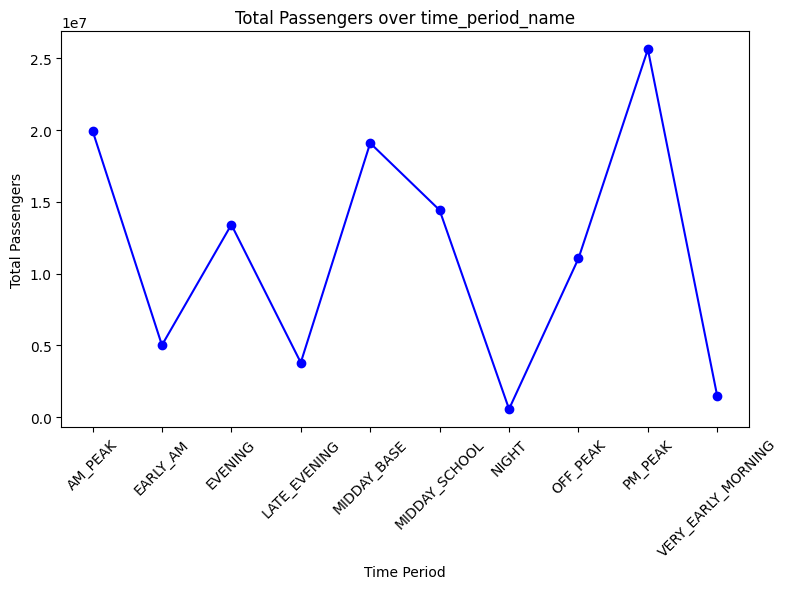

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating total_passengers
grouped_data = merged_df_1.groupby(time_column)['total_passengers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.plot(grouped_data['total_passengers'].iloc[:frame + 1], marker='o', color='blue')  # Plot cumulative data

    ax.set_xlabel('Time Period')
    ax.set_ylabel('Total Passengers')
    ax.set_title(f'Total Passengers over {time_column}')
    ax.set_xticks(range(len(grouped_data)))
    ax.set_xticklabels(grouped_data[time_column].tolist(), rotation=45)
    # ax.grid(True)
    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)

# Display the plot (optional)
plt.show()


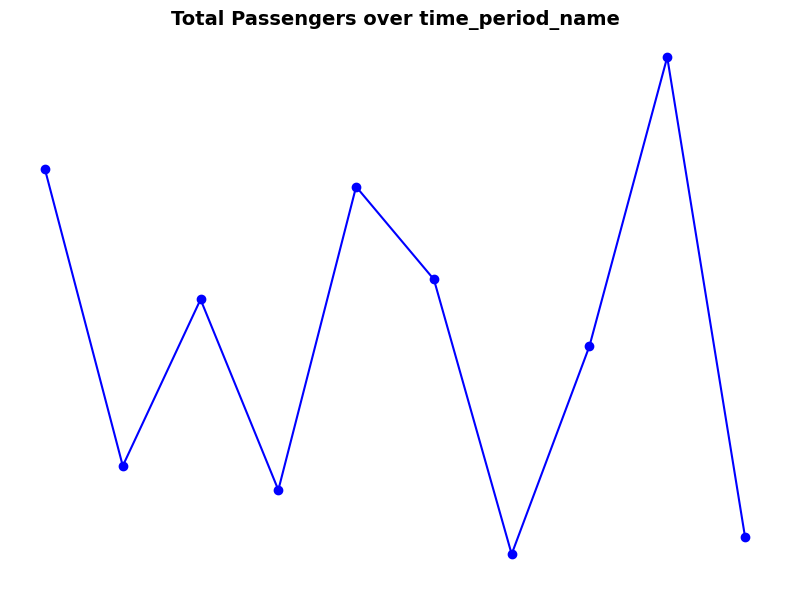

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating total_passengers
grouped_data = merged_df_1.groupby(time_column)['total_passengers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.plot(grouped_data['total_passengers'].iloc[:frame + 1], marker='o', color='blue')  # Plot cumulative data

    # Remove background elements (axes, ticks, gridlines)
    ax.set_axis_off()

    # Customize font properties for labels and title
    font = {'weight': 'bold', 'size': 14}
    ax.set_xlabel('Time Period', fontdict=font)
    ax.set_ylabel('Total Passengers', fontdict=font)
    ax.set_title(f'Total Passengers over {time_column}', fontdict=font)

    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)

# Display the plot (optional)
plt.show()


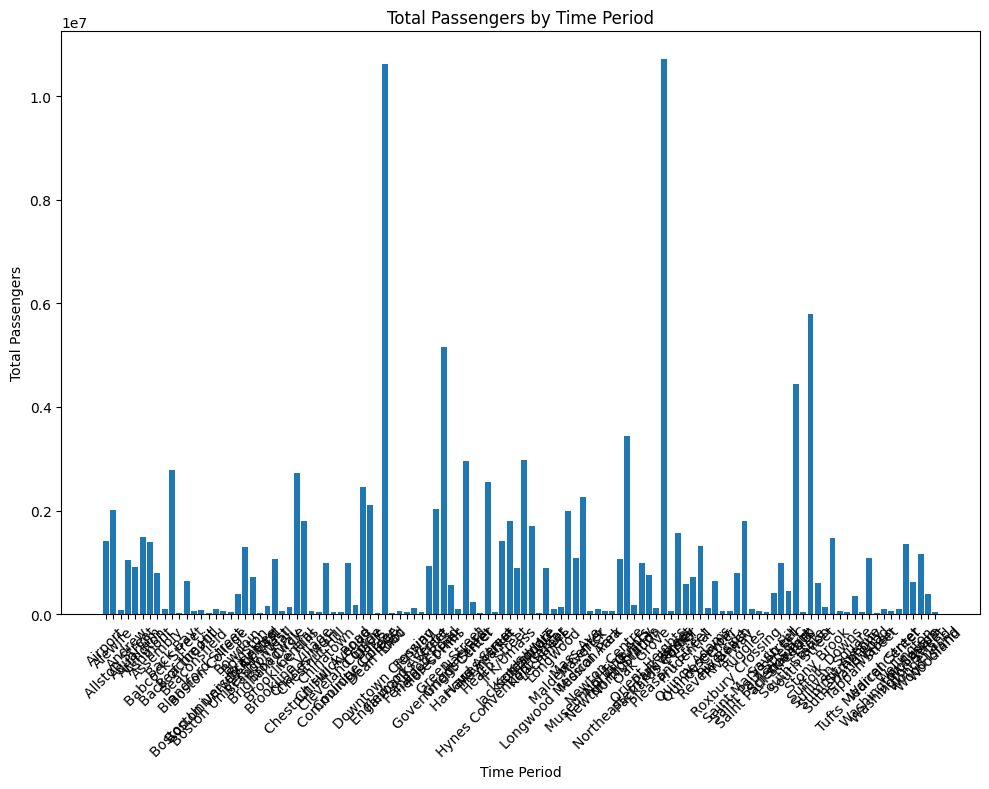

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

# Grouping by your desired column ('time_period_name' in your case) and aggregating 'total_passengers'
grouped_data = merged_df_1.groupby('stop_name')['total_passengers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(20, 20))  # Adjust figure size here

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.bar(grouped_data['stop_name'][:frame + 1], grouped_data['total_passengers'][:frame + 1])
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Total Passengers')
    ax.set_title(f'Total Passengers by Time Period')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_by_time_period.gif', writer='pillow', fps=5)

# Display the plot (optional)
plt.show()


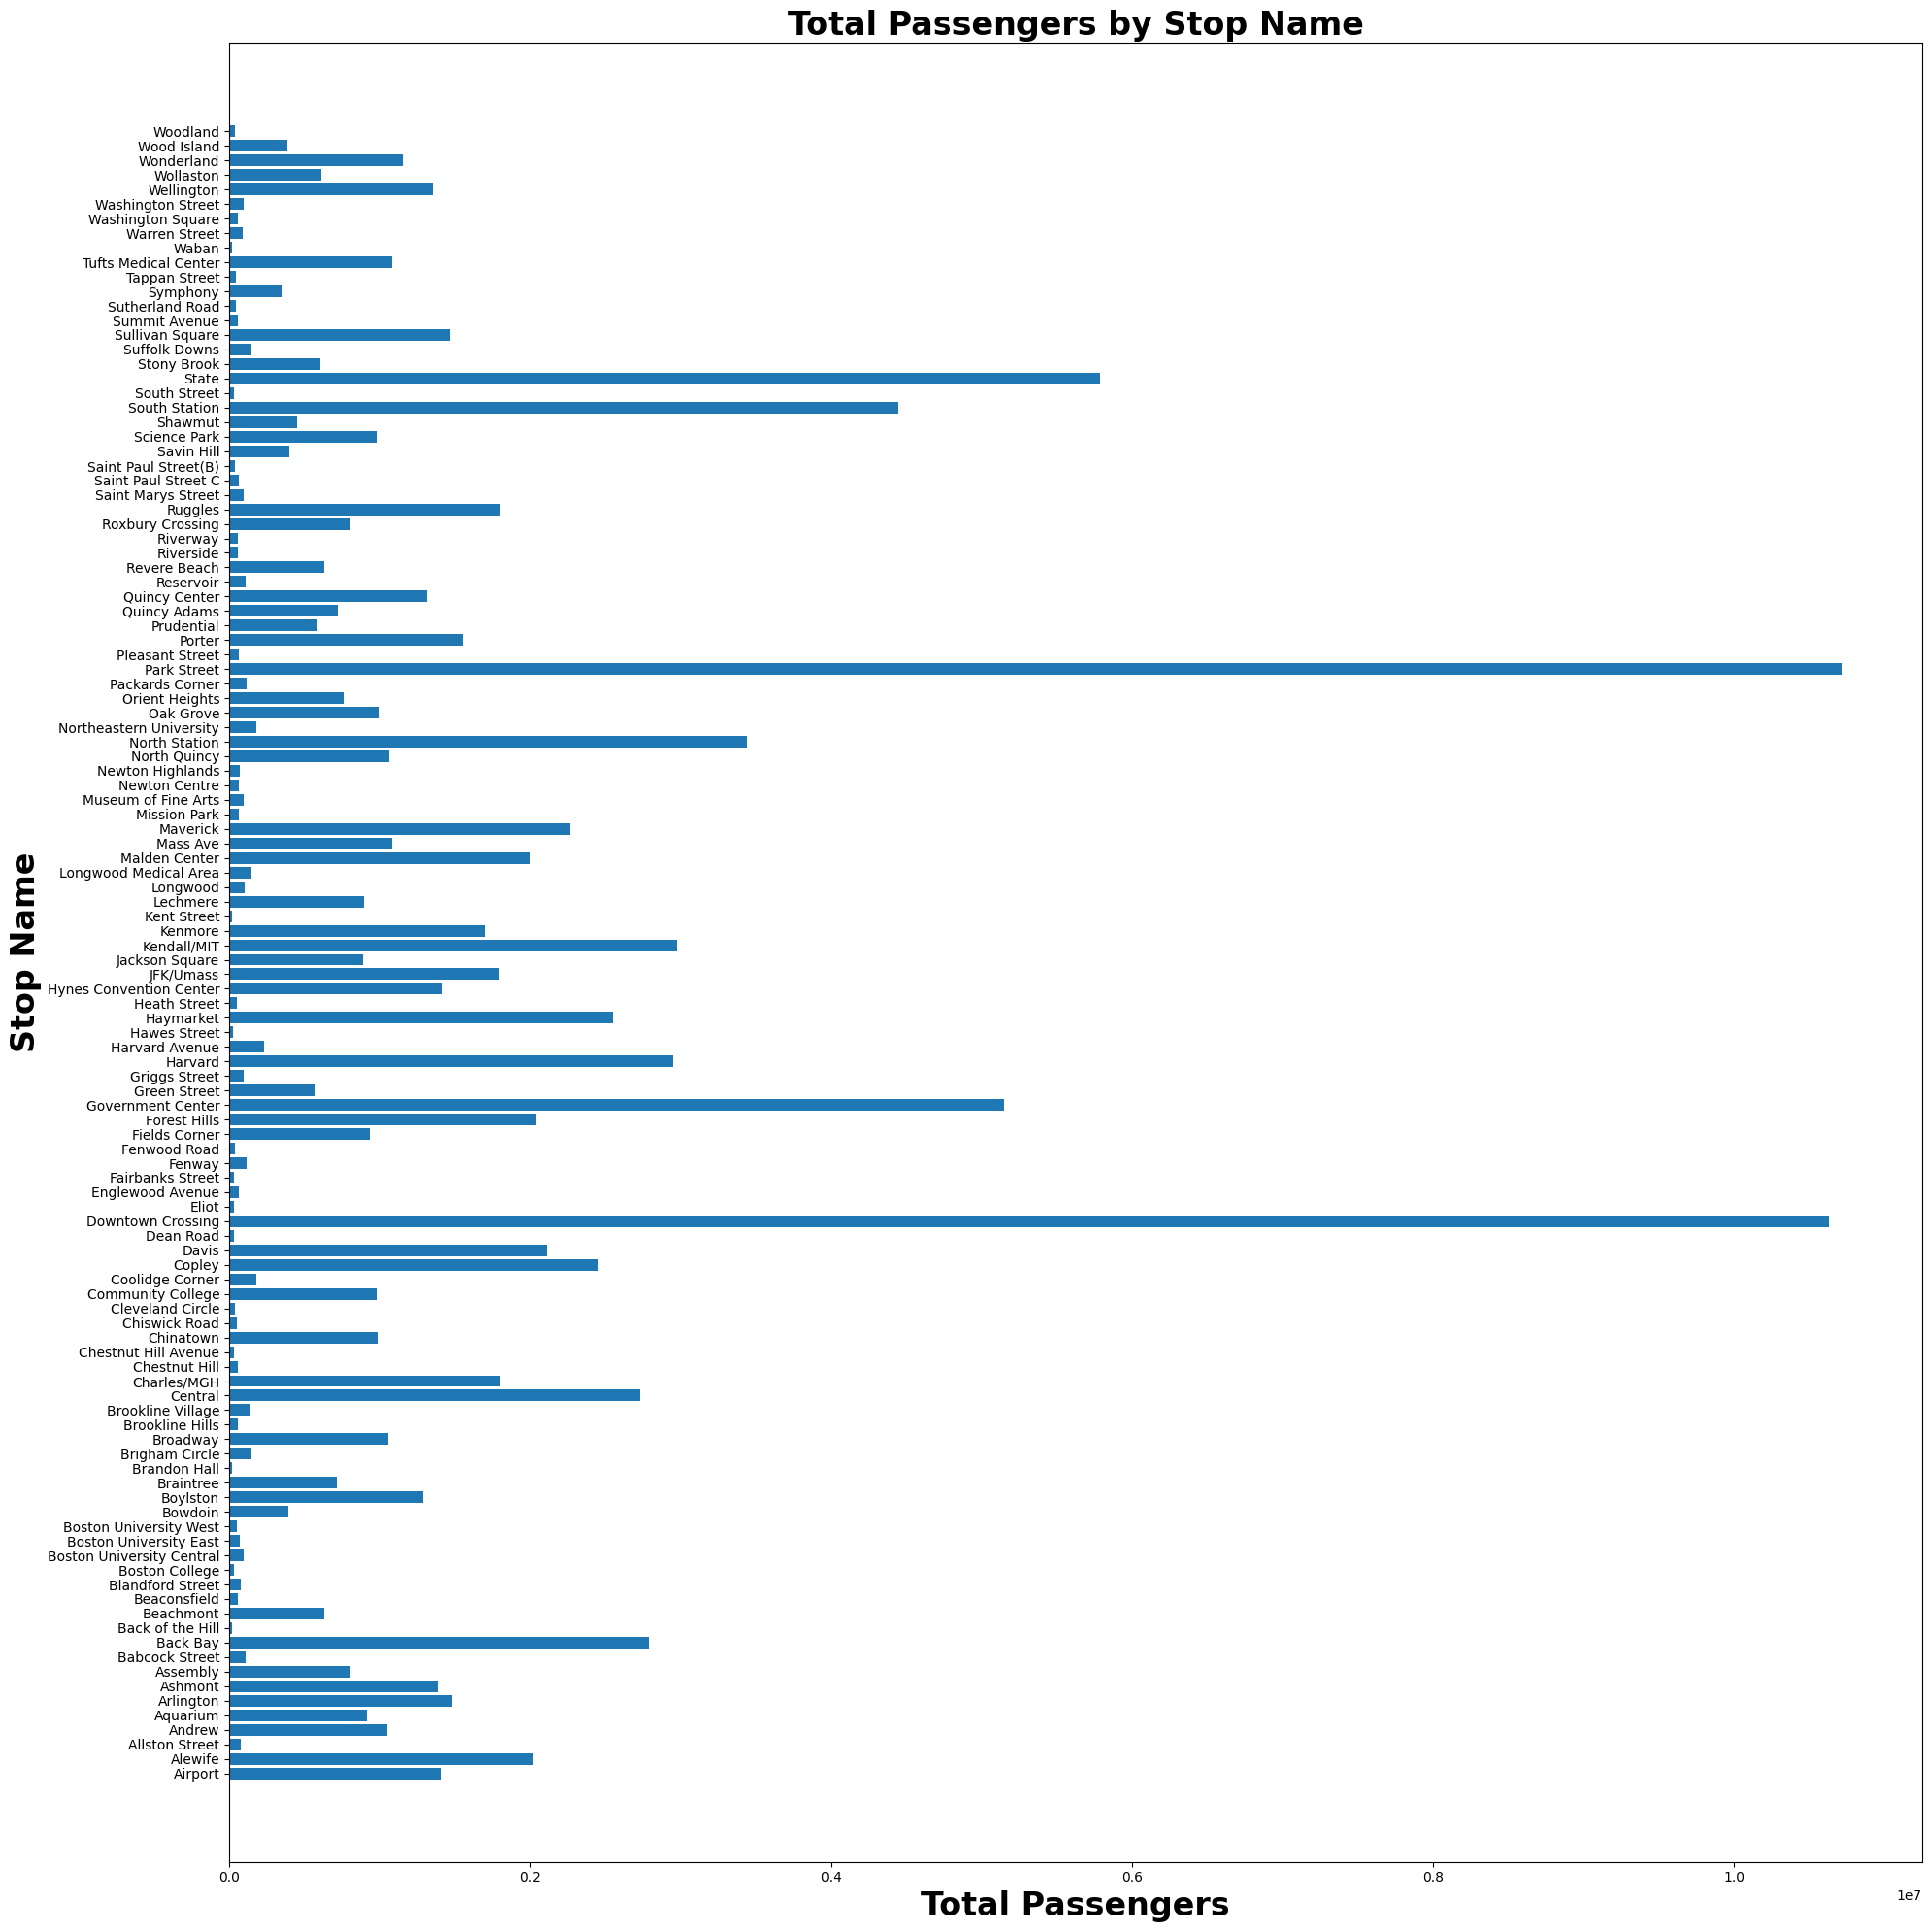

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

# Grouping by 'stop_name' and aggregating 'total_passengers'
grouped_data = merged_df_1.groupby('stop_name')['total_passengers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(20, 20))  # Adjust figure size here

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.barh(grouped_data['stop_name'][:frame + 1], grouped_data['total_passengers'][:frame + 1])
    font = {'weight': 'bold', 'size': 24}
    ax.set_ylabel('Stop Name',fontdict=font)
    ax.set_xlabel('Total Passengers',fontdict=font)
    ax.set_title(f'Total Passengers by Stop Name',fontdict=font)
    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_by_stop_name.gif', writer='pillow', fps=5)

# Display the plot (optional)
plt.show()


<ipython-input-39-c8c67d6858cd>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_ons', y='route_name', data=mbta_data, estimator=sum, ci=None, palette=color_dict, label='Total Ons')
<ipython-input-39-c8c67d6858cd>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_offs', y='route_name', data=mbta_data, estimator=sum, ci=None, palette=color_dict, label='Total Offs')


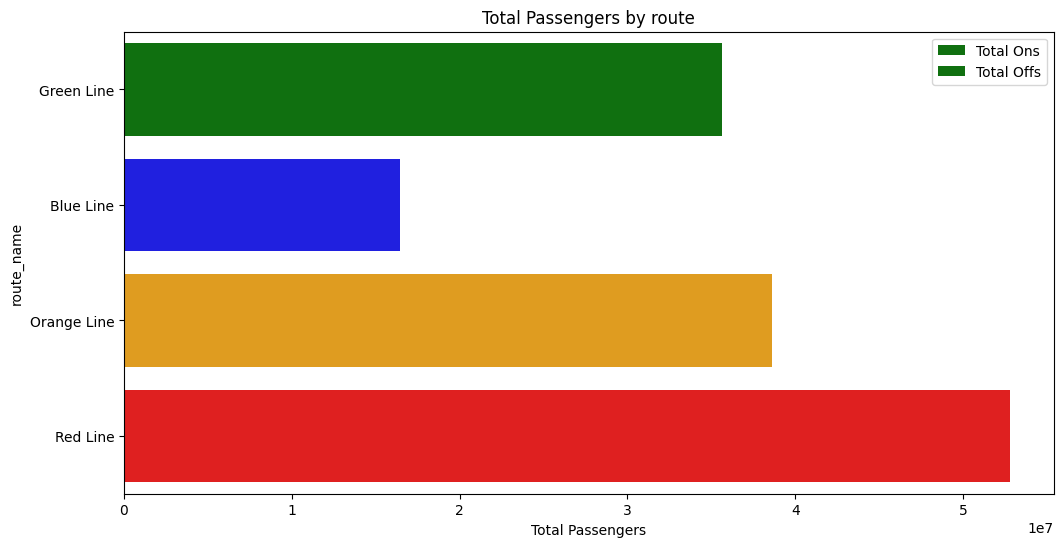

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mbta_data contains the necessary data for 'total_ons', 'total_offs', and 'route_name'

# Define a color palette dictionary where you assign colors to specific routes
color_dict = {'Green Line': 'green', 'Red Line': 'red', 'Blue Line': 'blue', 'Orange Line': 'orange'}

plt.figure(figsize=(12, 6))

# Use the palette parameter to assign colors based on the route_name
sns.barplot(x='total_ons', y='route_name', data=mbta_data, estimator=sum, ci=None, palette=color_dict, label='Total Ons')
sns.barplot(x='total_offs', y='route_name', data=mbta_data, estimator=sum, ci=None, palette=color_dict, label='Total Offs')

plt.xlabel('Total Passengers')
plt.title('Total Passengers by route')
plt.legend()
plt.show()

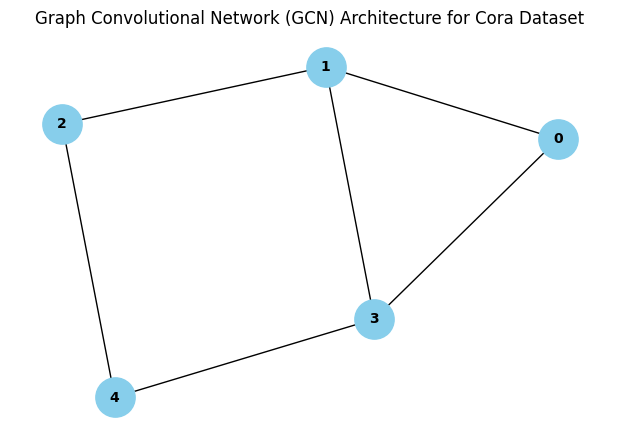

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Sample adjacency matrix (replace this with your actual adjacency matrix)
adjacency_matrix = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
])

# Create an empty graph
G = nx.Graph()

# Add edges based on the adjacency matrix
num_nodes = adjacency_matrix.shape[0]
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Plotting the graph
plt.figure(figsize=(6, 4))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_weight='bold', font_size=10)
plt.title('Graph Convolutional Network (GCN) Architecture for Cora Dataset', fontsize=12)
plt.axis('off')

# Show the plot
plt.show()


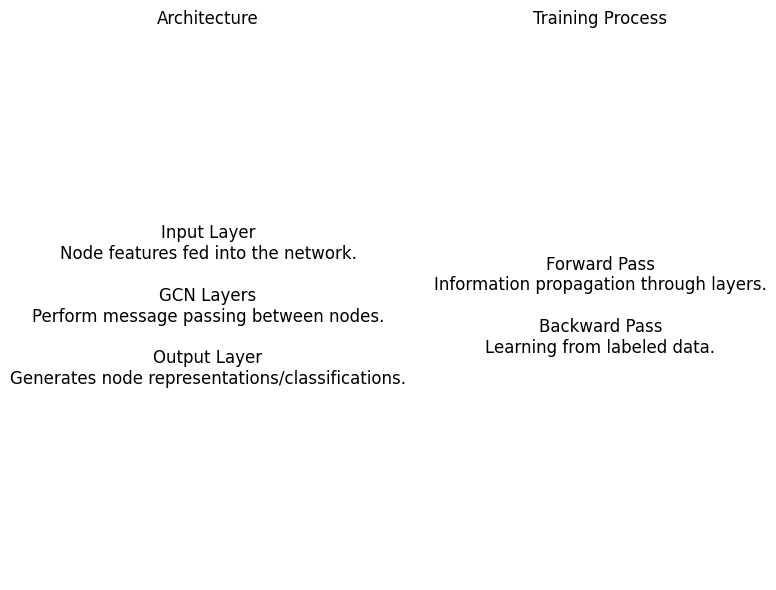

In [ ]:
import matplotlib.pyplot as plt

# Create a flowchart-style diagram for architecture and training process
plt.figure(figsize=(8, 6))

# Architecture
plt.subplot(1, 2, 1)
plt.title('Architecture')
arch_text = ("Input Layer\nNode features fed into the network.\n\n"
             "GCN Layers\nPerform message passing between nodes.\n\n"
             "Output Layer\nGenerates node representations/classifications.")
plt.text(0.5, 0.5, arch_text, ha='center', va='center', fontsize=12)
plt.axis('off')

# Training Process
plt.subplot(1, 2, 2)
plt.title('Training Process')
train_text = ("Forward Pass\nInformation propagation through layers.\n\n"
              "Backward Pass\nLearning from labeled data.")
plt.text(0.5, 0.5, train_text, ha='center', va='center', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
new_df = merged_df[['season', 'route_id', 'day_type_name', 'time_period_name', 'stop_name', 'total_ons', 'total_offs', 'ID', 'Lat', 'Lon']].copy()

# Calculate 'total_columns' as the sum of 'total_ons' and 'total_offs'
new_df['total_columns'] = new_df['total_ons'] + new_df['total_offs']

# Calculate the total 'green_passengers' based on 'route_name' being 'green'
green_passengers_count = new_df[new_df['route_id'] == 'Green']['total_columns'].sum()

In [ ]:
green_passengers_count

71245222

In [ ]:
new_df = merged_df[['season', 'route_id', 'day_type_name', 'time_period_name', 'stop_name', 'total_ons', 'total_offs', 'ID', 'Lat', 'Lon']].copy()

# Calculate 'total_columns' as the sum of 'total_ons' and 'total_offs'
new_df['total_columns'] = new_df['total_ons'] + new_df['total_offs']

# Create a new column 'green_passengers' containing the sum of 'total_columns' for 'route_name' being 'green'
new_df['green_passengers'] = new_df[new_df['route_id'] == 'Green']['total_columns'].sum()

In [ ]:
new_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7915  Fall 2017      Red       weekday               NIGHT          Andrew   
7916  Fall 2017      Red       weekday             AM_PEAK          Andrew   
7917  Fall 2017      Red       weekday         MIDDAY_BASE          Andrew   
7918  Fall 2017      Red        sunday            OFF_PEAK          Andrew   
7919  Fall 2017      Red      saturday            OFF_PEAK          Andrew   

      total_ons  total_offs  ID        Lat        Lon  total_columns  \
0             0          17   3 -71.138017  42.348725             17   
1           978        9838   3 -71.138017  42.348725          10816   
2           706        4528   3 -71.138017  42.348725           5234   
3          1028         818   3 -71.138017  42.348725           1846   
4           745        9213   3 -71.138017  42.348725           9958   
...         ...         ...  ..        ...        ...            ...   
7915        727         507   4 -71.057656  42.330153           1234   
7916     108239       37135   4 -71.057656  42.330153         145374   
7917      88856       31007   4 -71.057656  42.330153         119863   
7918      29606       14974   4 -71.057656  42.330153          44580   
7919      18504       43113   4 -71.057656  42.330153          61617   

      green_passengers  
0             71245222  
1             71245222  
2             71245222  
3             71245222  
4             71245222  
...                ...  
7915          71245222  
7916          71245222  
7917          71245222  
7918          71245222  
7919          71245222  

[7920 rows x 12 columns]

In [ ]:
green_2019_df = new_df[new_df['route_id'] == 'Green']


In [ ]:
green_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
4615  Fall 2017    Green       weekday               NIGHT   Warren Street   
4616  Fall 2017    Green        sunday            OFF_PEAK   Warren Street   
4617  Fall 2017    Green      saturday            OFF_PEAK   Warren Street   
4618  Fall 2017    Green       weekday             EVENING   Warren Street   
4619  Fall 2017    Green       weekday             PM_PEAK   Warren Street   

      total_ons  total_offs   ID        Lat        Lon  total_columns  \
0             0          17    3 -71.138017  42.348725             17   
1           978        9838    3 -71.138017  42.348725          10816   
2           706        4528    3 -71.138017  42.348725           5234   
3          1028         818    3 -71.138017  42.348725           1846   
4           745        9213    3 -71.138017  42.348725           9958   
...         ...         ...  ...        ...        ...            ...   
4615        146           4  107 -71.140419  42.348399            150   
4616       7519         762  107 -71.140419  42.348399           8281   
4617       8696         912  107 -71.140419  42.348399           9608   
4618       4413        1668  107 -71.140419  42.348399           6081   
4619       8572        1796  107 -71.140419  42.348399          10368   

      green_passengers  
0             71245222  
1             71245222  
2             71245222  
3             71245222  
4             71245222  
...                ...  
4615          71245222  
4616          71245222  
4617          71245222  
4618          71245222  
4619          71245222  

[4356 rows x 12 columns]

In [ ]:
print(green_2019_df.columns)


Index(['season', 'route_id', 'day_type_name', 'time_period_name', 'stop_name',
       'total_ons', 'total_offs', 'ID', 'Lat', 'Lon', 'total_columns',
       'green_passengers'],
      dtype='object')


In [ ]:
if 'green_passengers' in green_2019_df.columns:
    green_2019_df.drop('green_passengers', axis=1, inplace=True)
    print("DataFrame after dropping 'green_passengers' column:")
    print(green_2019_df)
else:
    print("The 'green_passengers' column does not exist in the DataFrame.")

DataFrame after dropping 'green_passengers' column:
         season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
4615  Fall 2017    Green       weekday               NIGHT   Warren Street   
4616  Fall 2017    Green        sunday            OFF_PEAK   Warren Street   
4617  Fall 2017    Green      saturday            OFF_PEAK   Warren Street   
4618  Fall 2017    Green       weekday             EVENING   Warren Street   
4619  Fall 2017    Green       weekday             PM_PEAK   Warren Street   

      total

<ipython-input-31-95a4d8347d08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_2019_df.drop('green_passengers', axis=1, inplace=True)


In [ ]:
green_2019_df

In [ ]:
green_2019_df = green_2019_df.drop('total_ons', axis=1, inplace=True)

AttributeError: ignored

In [ ]:
new_df = merged_df[['season', 'route_id','day_type_name', 'time_period_name','stop_name', 'total_ons', 'total_offs', 'ID', 'Lat', 'Lon']].copy()


In [ ]:
new_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7915  Fall 2017      Red       weekday               NIGHT          Andrew   
7916  Fall 2017      Red       weekday             AM_PEAK          Andrew   
7917  Fall 2017      Red       weekday         MIDDAY_BASE          Andrew   
7918  Fall 2017      Red        sunday            OFF_PEAK          Andrew   
7919  Fall 2017      Red      saturday            OFF_PEAK          Andrew   

      total_ons  total_offs  ID        Lat        Lon  
0             0          17   3 -71.138017  42.348725  
1           978        9838   3 -71.138017  42.348725  
2           706        4528   3 -71.138017  42.348725  
3          1028         818   3 -71.138017  42.348725  
4           745        9213   3 -71.138017  42.348725  
...         ...         ...  ..        ...        ...  
7915        727         507   4 -71.057656  42.330153  
7916     108239       37135   4 -71.057656  42.330153  
7917      88856       31007   4 -71.057656  42.330153  
7918      29606       14974   4 -71.057656  42.330153  
7919      18504       43113   4 -71.057656  42.330153  

[7920 rows x 10 columns]

In [ ]:
fall_2019_df = new_df[new_df['season'] == 'Fall 2019']


In [ ]:
fall_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7871  Fall 2019      Red       weekday             PM_PEAK          Andrew   
7872  Fall 2019      Red       weekday            EARLY_AM          Andrew   
7873  Fall 2019      Red       weekday               NIGHT          Andrew   
7874  Fall 2019      Red       weekday             EVENING          Andrew   
7875  Fall 2019      Red       weekday             AM_PEAK          Andrew   

      total_ons  total_offs  ID        Lat        Lon  
0             0          17   3 -71.138017  42.348725  
1           978        9838   3 -71.138017  42.348725  
2           706        4528   3 -71.138017  42.348725  
3          1028         818   3 -71.138017  42.348725  
4           745        9213   3 -71.138017  42.348725  
...         ...         ...  ..        ...        ...  
7871      42037       20536   4 -71.057656  42.330153  
7872      28326       22273   4 -71.057656  42.330153  
7873       1080        2548   4 -71.057656  42.330153  
7874      20013       11973   4 -71.057656  42.330153  
7875     102423       30032   4 -71.057656  42.330153  

[2640 rows x 10 columns]

In [ ]:
fall_2019_df['total_passengers'] = fall_2019_df['total_ons'] + fall_2019_df['total_offs']

# Dropping the 'total_ons' and 'total_offs' columns
fall_2019_df.drop(['total_ons', 'total_offs'], axis=1, inplace=True)

<ipython-input-95-a9afc0b57b17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df['total_passengers'] = fall_2019_df['total_ons'] + fall_2019_df['total_offs']
<ipython-input-95-a9afc0b57b17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df.drop(['total_ons', 'total_offs'], axis=1, inplace=True)


In [ ]:
fall_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7871  Fall 2019      Red       weekday             PM_PEAK          Andrew   
7872  Fall 2019      Red       weekday            EARLY_AM          Andrew   
7873  Fall 2019      Red       weekday               NIGHT          Andrew   
7874  Fall 2019      Red       weekday             EVENING          Andrew   
7875  Fall 2019      Red       weekday             AM_PEAK          Andrew   

      ID        Lat        Lon  total_passengers  
0      3 -71.138017  42.348725                17  
1      3 -71.138017  42.348725             10816  
2      3 -71.138017  42.348725              5234  
3      3 -71.138017  42.348725              1846  
4      3 -71.138017  42.348725              9958  
...   ..        ...        ...               ...  
7871   4 -71.057656  42.330153             62573  
7872   4 -71.057656  42.330153             50599  
7873   4 -71.057656  42.330153              3628  
7874   4 -71.057656  42.330153             31986  
7875   4 -71.057656  42.330153            132455  

[2640 rows x 9 columns]

In [ ]:
import numpy as np

In [ ]:
fall_2019_df['passengers_green'] = np.where(fall_2019_df['route_id'] == 'Green', fall_2019_df['total_passengers'], 0)

<ipython-input-98-75a988db8bc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df['passengers_green'] = np.where(fall_2019_df['route_id'] == 'Green', fall_2019_df['total_passengers'], 0)


In [ ]:
fall_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7871  Fall 2019      Red       weekday             PM_PEAK          Andrew   
7872  Fall 2019      Red       weekday            EARLY_AM          Andrew   
7873  Fall 2019      Red       weekday               NIGHT          Andrew   
7874  Fall 2019      Red       weekday             EVENING          Andrew   
7875  Fall 2019      Red       weekday             AM_PEAK          Andrew   

      ID        Lat        Lon  total_passengers  passengers_green  
0      3 -71.138017  42.348725                17                17  
1      3 -71.138017  42.348725             10816             10816  
2      3 -71.138017  42.348725              5234              5234  
3      3 -71.138017  42.348725              1846              1846  
4      3 -71.138017  42.348725              9958              9958  
...   ..        ...        ...               ...               ...  
7871   4 -71.057656  42.330153             62573                 0  
7872   4 -71.057656  42.330153             50599                 0  
7873   4 -71.057656  42.330153              3628                 0  
7874   4 -71.057656  42.330153             31986                 0  
7875   4 -71.057656  42.330153            132455                 0  

[2640 rows x 10 columns]

In [ ]:
fall_2019_df['passengers_red'] = np.where(fall_2019_df['route_id'] == 'Red', fall_2019_df['total_passengers'], 0)

<ipython-input-100-756e1aa372be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df['passengers_red'] = np.where(fall_2019_df['route_id'] == 'Red', fall_2019_df['total_passengers'], 0)


In [ ]:
fall_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7871  Fall 2019      Red       weekday             PM_PEAK          Andrew   
7872  Fall 2019      Red       weekday            EARLY_AM          Andrew   
7873  Fall 2019      Red       weekday               NIGHT          Andrew   
7874  Fall 2019      Red       weekday             EVENING          Andrew   
7875  Fall 2019      Red       weekday             AM_PEAK          Andrew   

      ID        Lat        Lon  total_passengers  passengers_green  \
0      3 -71.138017  42.348725                17                17   
1      3 -71.138017  42.348725             10816             10816   
2      3 -71.138017  42.348725              5234              5234   
3      3 -71.138017  42.348725              1846              1846   
4      3 -71.138017  42.348725              9958              9958   
...   ..        ...        ...               ...               ...   
7871   4 -71.057656  42.330153             62573                 0   
7872   4 -71.057656  42.330153             50599                 0   
7873   4 -71.057656  42.330153              3628                 0   
7874   4 -71.057656  42.330153             31986                 0   
7875   4 -71.057656  42.330153            132455                 0   

      passengers_red  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
7871           62573  
7872           50599  
7873            3628  
7874           31986  
7875          132455  

[2640 rows x 11 columns]

In [ ]:
fall_2019_df['passengers_blue'] = np.where(fall_2019_df['route_id'] == 'Blue', fall_2019_df['total_passengers'], 0)

<ipython-input-102-f5208884f86e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df['passengers_blue'] = np.where(fall_2019_df['route_id'] == 'Blue', fall_2019_df['total_passengers'], 0)


In [ ]:
fall_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7871  Fall 2019      Red       weekday             PM_PEAK          Andrew   
7872  Fall 2019      Red       weekday            EARLY_AM          Andrew   
7873  Fall 2019      Red       weekday               NIGHT          Andrew   
7874  Fall 2019      Red       weekday             EVENING          Andrew   
7875  Fall 2019      Red       weekday             AM_PEAK          Andrew   

      ID        Lat        Lon  total_passengers  passengers_green  \
0      3 -71.138017  42.348725                17                17   
1      3 -71.138017  42.348725             10816             10816   
2      3 -71.138017  42.348725              5234              5234   
3      3 -71.138017  42.348725              1846              1846   
4      3 -71.138017  42.348725              9958              9958   
...   ..        ...        ...               ...               ...   
7871   4 -71.057656  42.330153             62573                 0   
7872   4 -71.057656  42.330153             50599                 0   
7873   4 -71.057656  42.330153              3628                 0   
7874   4 -71.057656  42.330153             31986                 0   
7875   4 -71.057656  42.330153            132455                 0   

      passengers_red  passengers_blue  
0                  0                0  
1                  0                0  
2                  0                0  
3                  0                0  
4                  0                0  
...              ...              ...  
7871           62573                0  
7872           50599                0  
7873            3628                0  
7874           31986                0  
7875          132455                0  

[2640 rows x 12 columns]

In [ ]:
fall_2019_df['passengers_orange'] = np.where(fall_2019_df['route_id'] == 'Orange', fall_2019_df['total_passengers'], 0)

<ipython-input-104-03b1df7c5700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_2019_df['passengers_orange'] = np.where(fall_2019_df['route_id'] == 'Orange', fall_2019_df['total_passengers'], 0)


In [ ]:
fall_2019_df

season route_id day_type_name    time_period_name       stop_name  \
0     Fall 2019    Green       weekday  VERY_EARLY_MORNING  Allston Street   
1     Fall 2019    Green       weekday             PM_PEAK  Allston Street   
2     Fall 2019    Green       weekday       MIDDAY_SCHOOL  Allston Street   
3     Fall 2019    Green       weekday             AM_PEAK  Allston Street   
4     Fall 2019    Green       weekday             EVENING  Allston Street   
...         ...      ...           ...                 ...             ...   
7871  Fall 2019      Red       weekday             PM_PEAK          Andrew   
7872  Fall 2019      Red       weekday            EARLY_AM          Andrew   
7873  Fall 2019      Red       weekday               NIGHT          Andrew   
7874  Fall 2019      Red       weekday             EVENING          Andrew   
7875  Fall 2019      Red       weekday             AM_PEAK          Andrew   

      ID        Lat        Lon  total_passengers  passengers_green  \
0      3 -71.138017  42.348725                17                17   
1      3 -71.138017  42.348725             10816             10816   
2      3 -71.138017  42.348725              5234              5234   
3      3 -71.138017  42.348725              1846              1846   
4      3 -71.138017  42.348725              9958              9958   
...   ..        ...        ...               ...               ...   
7871   4 -71.057656  42.330153             62573                 0   
7872   4 -71.057656  42.330153             50599                 0   
7873   4 -71.057656  42.330153              3628                 0   
7874   4 -71.057656  42.330153             31986                 0   
7875   4 -71.057656  42.330153            132455                 0   

      passengers_red  passengers_blue  passengers_orange  
0                  0                0                  0  
1                  0                0                  0  
2                  0                0                  0  
3                  0                0                  0  
4                  0                0                  0  
...              ...              ...                ...  
7871           62573                0                  0  
7872           50599                0                  0  
7873            3628                0                  0  
7874           31986                0                  0  
7875          132455                0                  0  

[2640 rows x 13 columns]

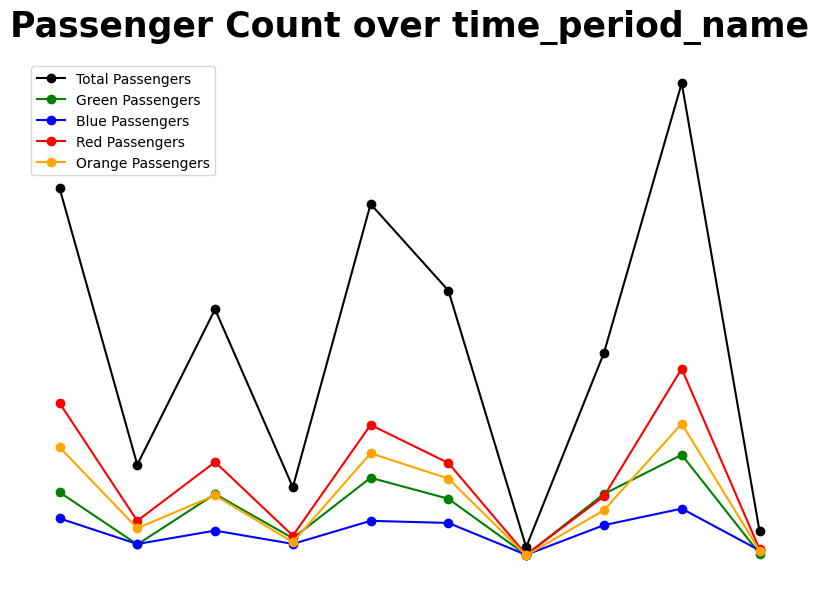

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating passengers for different categories
grouped_data = fall_2019_df.groupby(time_column).agg({
    'total_passengers': 'sum',
    'passengers_green': 'sum',
    'passengers_blue': 'sum',
    'passengers_red': 'sum',
    'passengers_orange': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()

    # Plotting multiple lines for different passenger categories
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['total_passengers'].iloc[:frame + 1], marker='o', color='black', label='Total Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_green'].iloc[:frame + 1], marker='o', color='green', label='Green Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_blue'].iloc[:frame + 1], marker='o', color='blue', label='Blue Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_red'].iloc[:frame + 1], marker='o', color='red', label='Red Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_orange'].iloc[:frame + 1], marker='o', color='orange', label='Orange Passengers')

    # Remove background elements (axes, ticks, gridlines)
    ax.set_axis_off()

    # Customize font properties for labels and title
    font = {'weight': 'bold', 'size': 25}
    ax.set_xlabel('Time Period', fontdict=font)
    ax.set_ylabel('Passenger Count', fontdict=font)
    ax.set_title(f'Passenger Count over {time_column}', fontdict=font)

    # Display legend
    ax.legend()

    plt.tight_layout()
# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)
plt.show()


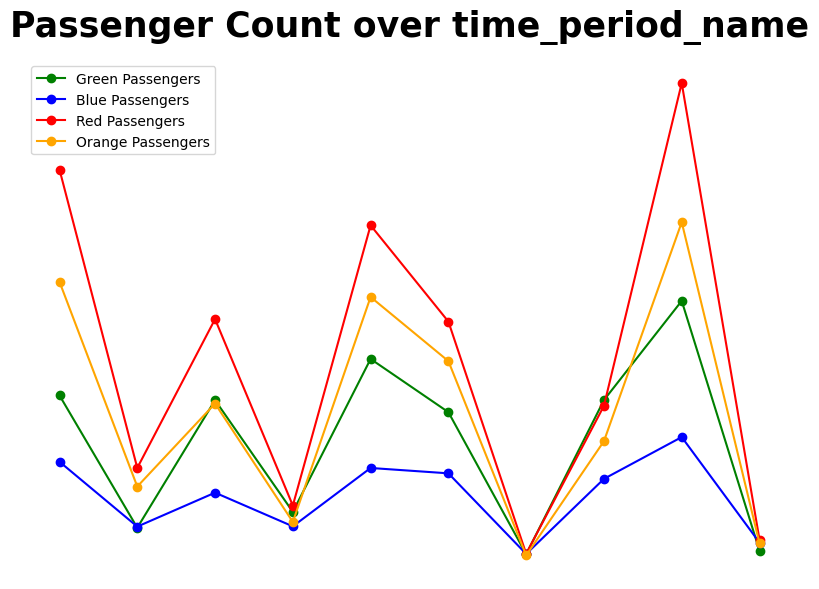

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating passengers for different categories
grouped_data = fall_2019_df.groupby(time_column).agg({
    'total_passengers': 'sum',
    'passengers_green': 'sum',
    'passengers_blue': 'sum',
    'passengers_red': 'sum',
    'passengers_orange': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()

    # Plotting multiple lines for different passenger categories
    # ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['total_passengers'].iloc[:frame + 1], marker='o', color='black', label='Total Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_green'].iloc[:frame + 1], marker='o', color='green', label='Green Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_blue'].iloc[:frame + 1], marker='o', color='blue', label='Blue Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_red'].iloc[:frame + 1], marker='o', color='red', label='Red Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_orange'].iloc[:frame + 1], marker='o', color='orange', label='Orange Passengers')

    # Remove background elements (axes, ticks, gridlines)
    ax.set_axis_off()

    # Customize font properties for labels and title
    font = {'weight': 'bold', 'size': 25}
    ax.set_xlabel('Time Period', fontdict=font)
    ax.set_ylabel('Passenger Count', fontdict=font)
    ax.set_title(f'Passenger Count over {time_column}', fontdict=font)

    # Display legend
    ax.legend()

    plt.tight_layout()
# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)
plt.show()

In [ ]:
grouped_data

time_period_name  total_passengers  passengers_green  passengers_blue  \
0             AM_PEAK          19963579           3533022          2117623   
1            EARLY_AM           5015320            709248           732954   
2             EVENING          13410175           3431615          1457628   
3        LATE_EVENING           3800434           1047316           738253   
4         MIDDAY_BASE          19094018           4311402          1984402   
5       MIDDAY_SCHOOL          14420902           3175781          1870116   
6               NIGHT            564355            143145           149092   
7            OFF_PEAK          11053230           3433292          1752040   
8             PM_PEAK          25625404           5551246          2643945   
9  VERY_EARLY_MORNING           1443946            219707           391537   

   passengers_red  passengers_orange  
0         8354171            5958763  
1         1985419            1587699  
2         5161487            3359445  
3         1182294             832571  
4         7164051            5634163  
5         5109532            4265473  
6          153552             118566  
7         3311396            2556502  
8        10199719            7230494  
9          453490             379212

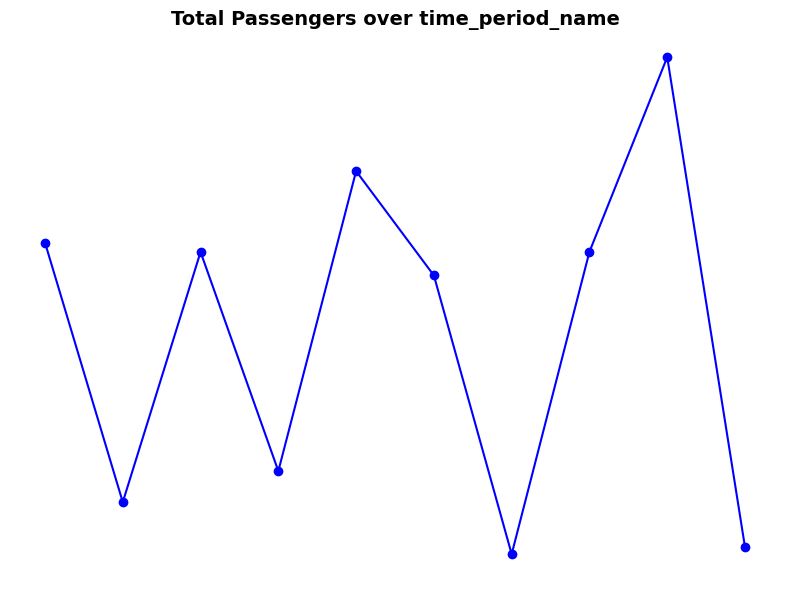

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating total_passengers
grouped_data = fall_2019_df.groupby(time_column)['passengers_green'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()
    ax.plot(grouped_data['passengers_green'].iloc[:frame + 1], marker='o', color='blue')  # Plot cumulative data

    # Remove background elements (axes, ticks, gridlines)
    ax.set_axis_off()

    # Customize font properties for labels and title
    font = {'weight': 'bold', 'size': 14}
    ax.set_xlabel('Time Period', fontdict=font)
    ax.set_ylabel('Total Passengers', fontdict=font)
    ax.set_title(f'Total Passengers over {time_column}', fontdict=font)

    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)

# Display the plot (optional)
plt.show()


In [ ]:
grouped_data

time_period_name  passengers_green
0             AM_PEAK           3533022
1            EARLY_AM            709248
2             EVENING           3431615
3        LATE_EVENING           1047316
4         MIDDAY_BASE           4311402
5       MIDDAY_SCHOOL           3175781
6               NIGHT            143145
7            OFF_PEAK           3433292
8             PM_PEAK           5551246
9  VERY_EARLY_MORNING            219707

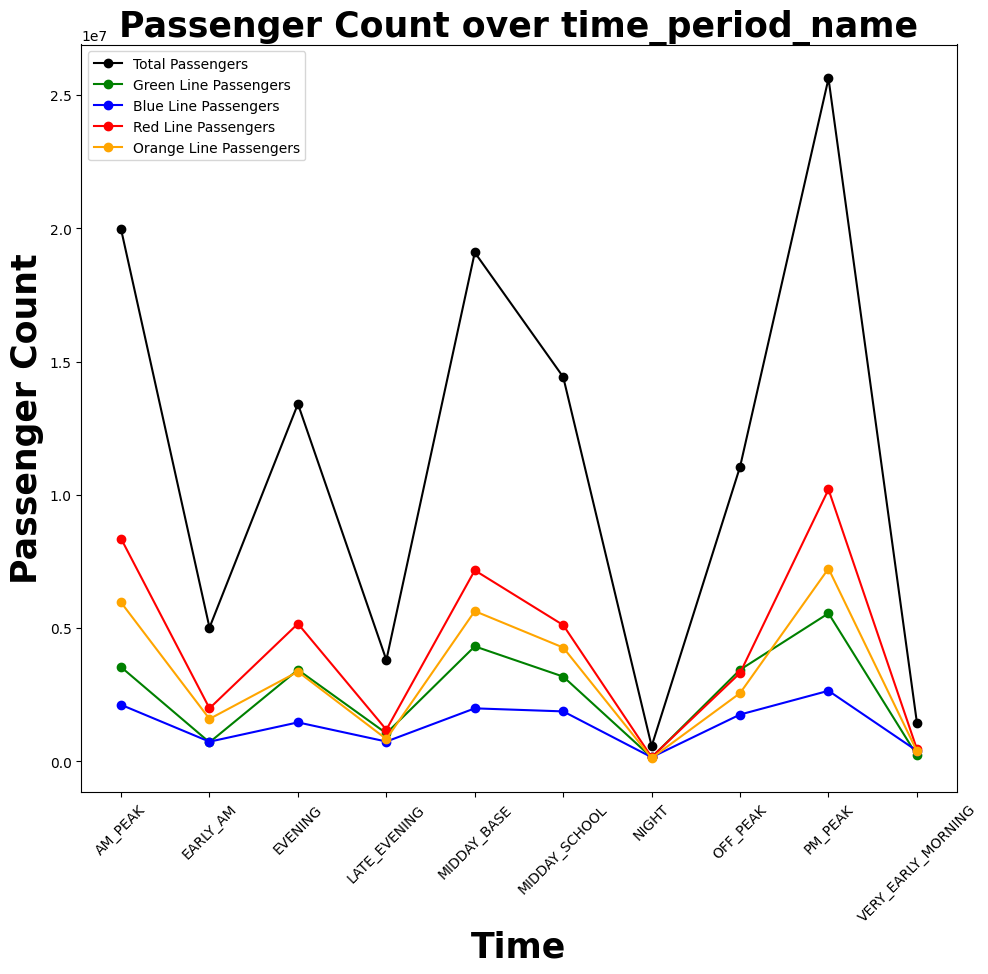

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating passengers for different categories
grouped_data = fall_2019_df.groupby(time_column).agg({
    'total_passengers': 'sum',
    'passengers_green': 'sum',
    'passengers_blue': 'sum',
    'passengers_red': 'sum',
    'passengers_orange': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 10))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()

    # Plotting multiple lines for different passenger categories
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['total_passengers'].iloc[:frame + 1], marker='o', color='black', label='Total Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_green'].iloc[:frame + 1], marker='o', color='green', label='Green Line Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_blue'].iloc[:frame + 1], marker='o', color='blue', label='Blue Line Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_red'].iloc[:frame + 1], marker='o', color='red', label='Red Line Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_orange'].iloc[:frame + 1], marker='o', color='orange', label='Orange Line Passengers')

    # Show axis and ticks
    ax.set_axis_on()

    # Customize font properties for labels and title
    font = {'weight': 'bold', 'size': 25}
    ax.set_xlabel('Time', fontdict=font)  # Updated x-axis label
    ax.set_ylabel('Passenger Count', fontdict=font)  # Updated y-axis label
    ax.set_title(f'Passenger Count over {time_column}', fontdict=font)  # Updated title

    # Display legend
    ax.legend()

    # Adjust x-axis ticks to display time periods more clearly
    ax.set_xticks(range(len(grouped_data)))
    ax.set_xticklabels(grouped_data[time_column].tolist(), rotation=45)  # Rotated x-axis labels for better readability

    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)
plt.show()


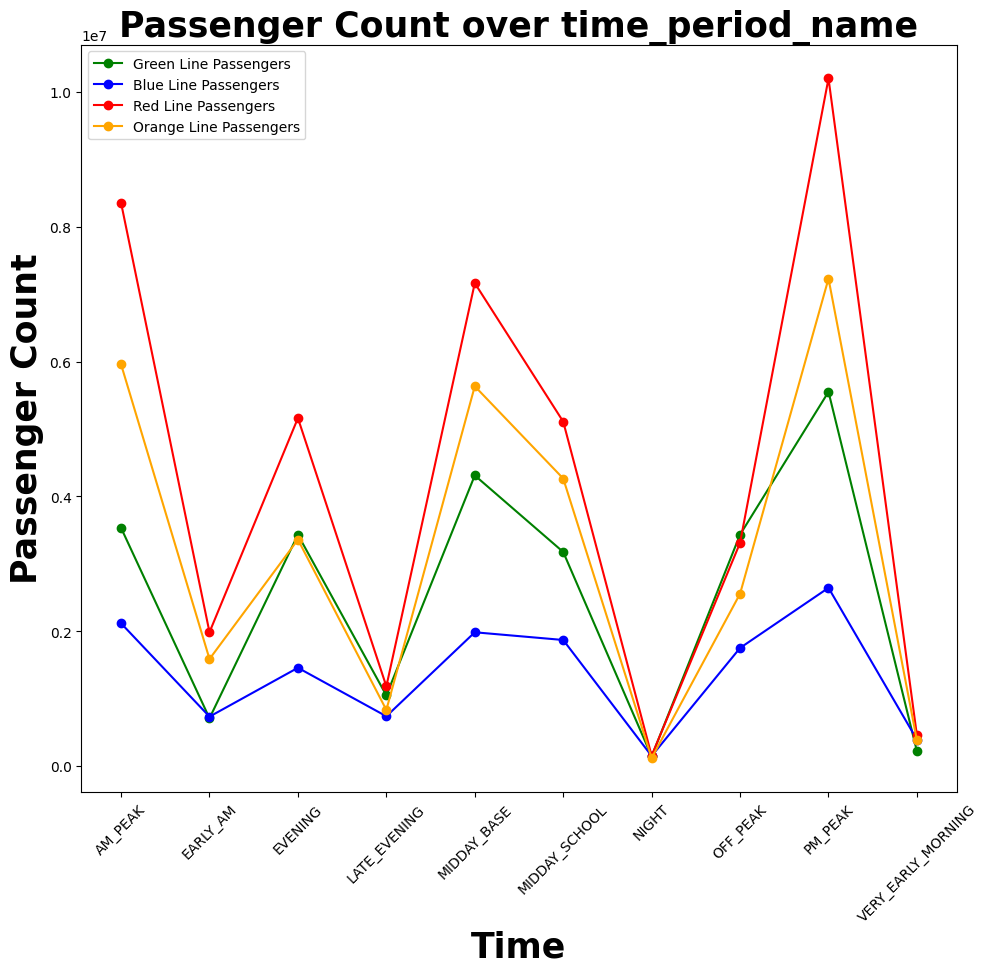

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
# merged_df_1 = pd.read_csv('your_data.csv')

time_column = 'time_period_name'  # Replace 'time_column_name' with your actual column name

# Grouping by time_column and aggregating passengers for different categories
grouped_data = fall_2019_df.groupby(time_column).agg({
    'total_passengers': 'sum',
    'passengers_green': 'sum',
    'passengers_blue': 'sum',
    'passengers_red': 'sum',
    'passengers_orange': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 10))

# Function to update the plot for each frame in the animation
def update(frame):
    ax.clear()

    # Plotting multiple lines for different passenger categories
    # ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['total_passengers'].iloc[:frame + 1], marker='o', color='black', label='Total Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_green'].iloc[:frame + 1], marker='o', color='green', label='Green Line Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_blue'].iloc[:frame + 1], marker='o', color='blue', label='Blue Line Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_red'].iloc[:frame + 1], marker='o', color='red', label='Red Line Passengers')
    ax.plot(grouped_data[time_column].iloc[:frame + 1], grouped_data['passengers_orange'].iloc[:frame + 1], marker='o', color='orange', label='Orange Line Passengers')

    # Show axis and ticks
    ax.set_axis_on()

    # Customize font properties for labels and title
    font = {'weight': 'bold', 'size': 25}
    ax.set_xlabel('Time', fontdict=font)  # Updated x-axis label
    ax.set_ylabel('Passenger Count', fontdict=font)  # Updated y-axis label
    ax.set_title(f'Passenger Count over {time_column}', fontdict=font)  # Updated title

    # Display legend
    ax.legend()

    # Adjust x-axis ticks to display time periods more clearly
    ax.set_xticks(range(len(grouped_data)))
    ax.set_xticklabels(grouped_data[time_column].tolist(), rotation=45)  # Rotated x-axis labels for better readability

    plt.tight_layout()

# Create an animation
ani = FuncAnimation(fig, update, frames=len(grouped_data), repeat=False)

# Save the animation as a GIF
ani.save('total_passengers_over_time.gif', writer='pillow', fps=2)
plt.show()